<a href="https://colab.research.google.com/github/MariiaKalinina/BM/blob/main/BM_initial_10_layer_v2_22_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [389]:
import pandas as pd
import numpy as np
from math import *
from scipy.special import lambertw
import matplotlib.pyplot as plt

In [390]:
!pip install GitPython

In [391]:
from git import Repo
!git clone https://github.com/MariiaKalinina/BM.git

fatal: destination path 'BM' already exists and is not an empty directory.


### Step 0. Data preparation

In [392]:
# import pandas as pd

# Allen & Allne - Data (10 layers)
# df_constast = pd.read_csv('/content/BM/Initial data/Constants.csv', delimiter=';', header=0)
# df_well = pd.read_csv('/content/BM/Initial data/Well_parametrs.csv', delimiter=';', header=0)

# Test Data-1
df_constast = pd.read_csv('/content/BM/Initial data/Constants.csv', delimiter=';', header=0)
df_well = pd.read_csv('/content/BM/Initial data/Well_parametrs_test1.csv', delimiter=';', header=0)

# df_well = pd.read_csv('/content/Well_parametrs_v1.csv', delimiter=';', header=0) ### пример для 3х слойной модели
# df_well = pd.read_csv('/content/BM/Well_parametrs_A13.csv', delimiter=';', header=0) ### Geoterm test - Appendix 13

df_well[['Depth top, m', 'Depth bottom, m']] = df_well[['Depth top, m', 'Depth bottom, m']].apply(lambda x: x / 1000)

In [393]:
df_well

,Well,Event_name,Event_type,Lithology_type,Age (Ma),"Depth top, m","Depth bottom, m","Thickness, m","D Thickness (erosion), m","Paleobathymetry, Ma","Sea level, m",Sublayers,N sublayers,PSE,Kinetic,"TOC initial, %","HI initial, %"
0,Test_well,Erosion,Erosion,NaN,0,0.00,0.00,0,NaN,300,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Test_well,Layer 10,Erosion,Shales,0,0.00,0.20,200,NaN,300,0,On,0.0,NaN,NaN,NaN,NaN
2,Test_well,Layer 9,Deposition,Sandstones,45,0.20,0.45,250,NaN,325,40,On,0.0,NaN,NaN,NaN,NaN
3,Test_well,Layer 8,Deposition,Shales,55,0.45,1.20,750,NaN,350,50,On,0.0,NaN,NaN,NaN,NaN
4,Test_well,Layer 7,Deposition,Chalk,80,1.20,2.50,1300,NaN,300,100,On,0.0,NaN,NaN,NaN,NaN
5,Test_well,Layer 6,Deposition,Sandstones,100,2.50,3.40,900,NaN,200,80,On,0.0,NaN,NaN,NaN,NaN
6,Test_well,Layer 5,Deposition,Limestones,125,3.40,3.60,200,NaN,20,70,On,0.0,Source Rock,Tegelaar(1994)_TI-S(Spain),10.0,100.0
7,Test_well,Layer 4,Deposition,Dolomite,145,3.60,4.00,400,NaN,20,-40,On,0.0,NaN,NaN,NaN,NaN
8,Test_well,Layer 3,Deposition,Sandstones,160,4.00,4.25,250,NaN,10,-20,On,0.0,NaN,NaN,NaN,NaN
9,Test_well,Layer 2,Deposition,Anhydrite,210,4.25,5.00,750,NaN,20,0,On,0.0,NaN,NaN,NaN,NaN


In [394]:
df_constast

,Lithology_type,Porosity,"Exp_decay, km-1",Grain density,TC matrix,Radiogenic Heat Production,Ki_framework
0,Shales,0.63,0.51,2720,2.0,1.700000e-06,2.0
1,Sandstones,0.49,0.27,2650,5.5,1.200000e-06,5.5
2,Chalk,0.70,0.71,2710,3.3,4.000000e-07,3.3
3,Limestones,0.40,0.60,2710,3.3,5.000000e-07,3.3
4,Dolomite,0.20,0.60,2870,5.3,4.000000e-07,5.3
5,Anhydrite,0.05,0.20,2960,6.3,1.000000e-07,6.3
6,Quartzite,0.20,0.30,2650,7.7,5.000000e-07,7.7
7,Fundament,0.00,0.00,2800,3.0,2.800000e-06,3.0


### DataBase

In [395]:
import pandas as pd

file_path = '/content/BM/Initial data/Literature database from PM for all rock lithotypes.xlsx'

database = pd.ExcelFile(file_path)
print("Available sheets:", database.sheet_names)

for sheet_name in database.sheet_names:
    clean_name = sheet_name.replace(" ", "_").replace("-", "_")
    var_name = f"Database_{clean_name}"

    # Assign the DataFrame to a dynamically named variable
    globals()[var_name] = pd.read_excel(
        file_path,
        sheet_name=sheet_name,
        header=0
    )
    print(f"Created variable: {var_name}")

Available sheets: ['Lithotypes', 'Kinetics all', 'Secondary cracking', 'Geochronology', 'SWIT_Map', 'SWIT_coordinates ', 'Global eustatic curve']
Created variable: Database_Lithotypes
Created variable: Database_Kinetics_all
Created variable: Database_Secondary_cracking
Created variable: Database_Geochronology
Created variable: Database_SWIT_Map
Created variable: Database_SWIT_coordinates_
Created variable: Database_Global_eustatic_curve


#### Lithology

In [396]:
from pandas.api.types import is_scalar

Database_Lithotypes.columns = Database_Lithotypes.iloc[0]
Database_Lithotypes = Database_Lithotypes.drop([0, 1]).reset_index(drop=True)

current_columns = Database_Lithotypes.columns
if is_scalar(current_columns[0]) and pd.isna(current_columns[0]):
    new_columns = list(current_columns)
    new_columns[0] = "Lithology type"
    Database_Lithotypes.columns = new_columns

Database_Lithotypes.head(7)

,Lithology type,Density,Initial porosity,Minimum porosity,Compaction model Key,Compressibility MAX,Compressibility MIN,Athy factor k (stress),Schneider Factor ka,Schneider factor kb,...,Ea,A,Clay Content,Porosity Opal A- opal CT,Permeability Opal A- Opal CT,Capillary Pressure Opal A-opal CT,Porosity Opal CT-Quartz,Permeability Opal CT - Quartz,Capillary pressure Opal CT - Quartz,Special options
0,Sandstone (typical),2720,41,1,Athy's law (depth),27.47,1.15,26.6,41.56,17.81,...,23.2,0.0,0,0,0,0,0,0,0,NaN
1,Sandstone (clay rich),2760,40,1,Athy's law (depth),26.54,1.11,26.61,40,18.12,...,23.2,0.0,0,0,0,0,0,0,0,NaN
2,Sandstone (clay poor),2700,42,1,Athy's law (depth),28.05,1.18,26.27,40.47,17.34,...,23.2,0.0,0,0,0,0,0,0,0,NaN
3,"Sandstone (quartzite, typical)",2640,42,1,Athy's law (depth),29.1,1.22,27.26,42.81,17.81,...,23.2,0.0,0,0,0,0,0,0,0,NaN
4,"Sandstone (quartzite, very quartz rich)",2640,42,1,Athy's law (depth),25.26,1.18,24.61,16.15,39.77,...,23.2,0.0,0,0,0,0,0,0,0,NaN
5,"Sandstone (subarkose, typical)",2680,41,1,Athy's law (depth),24.48,1.14,24.68,16.31,38.74,...,23.2,0.0,0,0,0,0,0,0,0,NaN
6,"Sandstone (subarkose, quartz rich)",2650,42,1,Athy's law (depth),26.34,1.19,25.33,39.84,16.41,...,23.2,0.0,0,0,0,0,0,0,0,NaN


In [397]:
print("Current columns:")
for idx, col in enumerate(Database_Lithotypes.columns, 1):
    print(f"{idx}. {col}")

Current columns:
1. Lithology type
2. Density
3. Initial porosity
4. Minimum porosity
5. Compaction model Key
6. Compressibility MAX
7. Compressibility MIN
8. Athy factor k (stress)
9. Schneider Factor ka
10. Schneider factor kb
11. Schneider factor phi
12. Athy factor k (depth)
13. Multipoint curve
14. Curve flag
15. Depth curve
16. Effective stress curve
17. Compaction formula
18. Thermal conductivity model key
19. Thermal conductivity at 20 oC
20. Thermal conductivity at 100 oC
21. Thermal conductivity minimum temperature
22. Thermal conductivity max temperature
23. Thermal conductivity conductivity multi-point model
24. Anisotropy factor thermal conductivity
25. Depositional anisotropy
26. Depositional anisotropy
27. Thermal expansion coefficient 
28. Radiogenic model key
29. Uranium
30. Thorium
31. Potassium
32. Porosity
33. Gamma Ray
34. Time correction
35. HeatFlow Production value
36. Half Depth Value
37. Heat capacity model key
38. Heat capacity at 20 oC
39. Heat capacity at 1

In [398]:
sandstone_row = Database_Lithotypes[Database_Lithotypes['Lithology type'] == 'Sandstone (quartzite, very quartz rich)']
sandstone_row

,Lithology type,Density,Initial porosity,Minimum porosity,Compaction model Key,Compressibility MAX,Compressibility MIN,Athy factor k (stress),Schneider Factor ka,Schneider factor kb,...,Ea,A,Clay Content,Porosity Opal A- opal CT,Permeability Opal A- Opal CT,Capillary Pressure Opal A-opal CT,Porosity Opal CT-Quartz,Permeability Opal CT - Quartz,Capillary pressure Opal CT - Quartz,Special options
4,"Sandstone (quartzite, very quartz rich)",2640,42,1,Athy's law (depth),25.26,1.18,24.61,16.15,39.77,...,23.2,0.0,0,0,0,0,0,0,0,NaN


In [399]:
sandstone_row["Compressibility MIN"]

,Compressibility MIN
4,1.18


# Layers Subdivision

In [400]:
# Кол-во слоев по которым будет проходит расчет.
# Не учитывает первый слой - Эрозию и последний - Фундамент
layers_quantity = len(df_well[1:df_well.shape[0]-1]) #amount of layers for calculation
layers_quantity

10

In [401]:
# work_layers = df_well[1:df_well.shape[0]-1] ### Слои, по которым идет расчет
work_layers = df_well[1:df_well.shape[0]] ### Слои, по которым идет расчет
work_layers_initial = work_layers.copy()
work_layers_initial

,Well,Event_name,Event_type,Lithology_type,Age (Ma),"Depth top, m","Depth bottom, m","Thickness, m","D Thickness (erosion), m","Paleobathymetry, Ma","Sea level, m",Sublayers,N sublayers,PSE,Kinetic,"TOC initial, %","HI initial, %"
1,Test_well,Layer 10,Erosion,Shales,0,0.00,0.20,200,NaN,300,0,On,0.0,NaN,NaN,NaN,NaN
2,Test_well,Layer 9,Deposition,Sandstones,45,0.20,0.45,250,NaN,325,40,On,0.0,NaN,NaN,NaN,NaN
3,Test_well,Layer 8,Deposition,Shales,55,0.45,1.20,750,NaN,350,50,On,0.0,NaN,NaN,NaN,NaN
4,Test_well,Layer 7,Deposition,Chalk,80,1.20,2.50,1300,NaN,300,100,On,0.0,NaN,NaN,NaN,NaN
5,Test_well,Layer 6,Deposition,Sandstones,100,2.50,3.40,900,NaN,200,80,On,0.0,NaN,NaN,NaN,NaN
6,Test_well,Layer 5,Deposition,Limestones,125,3.40,3.60,200,NaN,20,70,On,0.0,Source Rock,Tegelaar(1994)_TI-S(Spain),10.0,100.0
7,Test_well,Layer 4,Deposition,Dolomite,145,3.60,4.00,400,NaN,20,-40,On,0.0,NaN,NaN,NaN,NaN
8,Test_well,Layer 3,Deposition,Sandstones,160,4.00,4.25,250,NaN,10,-20,On,0.0,NaN,NaN,NaN,NaN
9,Test_well,Layer 2,Deposition,Anhydrite,210,4.25,5.00,750,NaN,20,0,On,0.0,NaN,NaN,NaN,NaN
10,Test_well,Layer 1,Deposition,Quartzite,245,5.00,5.40,400,NaN,0,0,On,0.0,NaN,NaN,NaN,NaN


In [402]:
work_layers['Sublayers'] = 'On'
work_layers['N sublayers'] = int(1)
# work_layers.loc[work_layers['Event_name'] == 'Layer 7', 'Sublayers'] = 'On'
# work_layers.loc[work_layers['Event_name'] == 'Layer 7', 'N sublayers'] = int(1)

<ipython-input-402-0466dcd079e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_layers['Sublayers'] = 'On'
<ipython-input-402-0466dcd079e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_layers['N sublayers'] = int(1)


In [403]:
work_layers[0:]

,Well,Event_name,Event_type,Lithology_type,Age (Ma),"Depth top, m","Depth bottom, m","Thickness, m","D Thickness (erosion), m","Paleobathymetry, Ma","Sea level, m",Sublayers,N sublayers,PSE,Kinetic,"TOC initial, %","HI initial, %"
1,Test_well,Layer 10,Erosion,Shales,0,0.00,0.20,200,NaN,300,0,On,1,NaN,NaN,NaN,NaN
2,Test_well,Layer 9,Deposition,Sandstones,45,0.20,0.45,250,NaN,325,40,On,1,NaN,NaN,NaN,NaN
3,Test_well,Layer 8,Deposition,Shales,55,0.45,1.20,750,NaN,350,50,On,1,NaN,NaN,NaN,NaN
4,Test_well,Layer 7,Deposition,Chalk,80,1.20,2.50,1300,NaN,300,100,On,1,NaN,NaN,NaN,NaN
5,Test_well,Layer 6,Deposition,Sandstones,100,2.50,3.40,900,NaN,200,80,On,1,NaN,NaN,NaN,NaN
6,Test_well,Layer 5,Deposition,Limestones,125,3.40,3.60,200,NaN,20,70,On,1,Source Rock,Tegelaar(1994)_TI-S(Spain),10.0,100.0
7,Test_well,Layer 4,Deposition,Dolomite,145,3.60,4.00,400,NaN,20,-40,On,1,NaN,NaN,NaN,NaN
8,Test_well,Layer 3,Deposition,Sandstones,160,4.00,4.25,250,NaN,10,-20,On,1,NaN,NaN,NaN,NaN
9,Test_well,Layer 2,Deposition,Anhydrite,210,4.25,5.00,750,NaN,20,0,On,1,NaN,NaN,NaN,NaN
10,Test_well,Layer 1,Deposition,Quartzite,245,5.00,5.40,400,NaN,0,0,On,1,NaN,NaN,NaN,NaN


In [ ]:
# filtered_df = df_well[df_well['Event_name'] != 'Erosion']

In [404]:
df_well.iloc[-1]

,11
Well,Test_well
Event_name,Fundament
Event_type,Deposition
Lithology_type,NaN
Age (Ma),260
"Depth top, m",5.4
"Depth bottom, m",5.4
"Thickness, m",0
"D Thickness (erosion), m",NaN
"Paleobathymetry, Ma",-20


In [405]:
def layers_subdivision(work_layers, on=True):

  df_repeated = pd.DataFrame()

  if on == False:
    return work_layers

  else:

    result_df = pd.DataFrame()
    work_layers_copy = work_layers[0:].copy()

    for index, row in work_layers_copy.iterrows():
        if not pd.isnull(row['N sublayers']):
            # Calculate the interval value
            print(row['Depth bottom, m'], row['Depth top, m'], int(row['N sublayers']))
            interval = (row['Depth bottom, m'] - row['Depth top, m']) / int(row['N sublayers'])
            interval_thickness = row['Thickness, m'] / (int(row['N sublayers']))

            interval_age = 0
            next_index = index + 1
            if next_index < len(work_layers_copy):
              next_row = work_layers_copy.loc[next_index]
              interval_age = (next_row['Age (Ma)'] - row['Age (Ma)']) / (int(row['N sublayers']))
            else:
              last_row= df_well.iloc[-1]
              next_row = last_row
              interval_age = (next_row['Age (Ma)'] - row['Age (Ma)']) / (int(row['N sublayers']))

            # Repeat the row 'div' times and append to the new DataFrame
            repeated_rows = [row.copy() for _ in range(int(row['N sublayers']))]
            for i, r in enumerate(repeated_rows):
                r['Event_name'] = row['Event_name'] + f'_{i+1}'
                r['Depth top, m'] = row['Depth top, m'] + i * interval
                r['Depth bottom, m'] = row['Depth top, m'] + (i + 1) * interval
                r['Thickness, m'] = interval_thickness
                r['Age (Ma)'] = row['Age (Ma)'] + i*interval_age
            df_repeated = pd.concat([df_repeated, pd.DataFrame(repeated_rows)], ignore_index=True)
        else:
            df_repeated = pd.concat([df_repeated, pd.DataFrame([row])], ignore_index=True)

    return df_repeated

In [406]:
work_layers = layers_subdivision(work_layers, on=True)
# work_layers = layers_subdivision(work_layers, on=True)
###
  # on = True make subdivision
###

0.2 0.0 1
0.45 0.2 1
1.2 0.45 1
2.5 1.2 1
3.4 2.5 1
3.6 3.4 1
4.0 3.6 1
4.25 4.0 1
5.0 4.25 1
5.4 5.0 1
5.4 5.4 1


In [407]:
work_layers_copy_initial = work_layers.copy()

In [408]:
work_layers_copy_initial

,Well,Event_name,Event_type,Lithology_type,Age (Ma),"Depth top, m","Depth bottom, m","Thickness, m","D Thickness (erosion), m","Paleobathymetry, Ma","Sea level, m",Sublayers,N sublayers,PSE,Kinetic,"TOC initial, %","HI initial, %"
0,Test_well,Layer 10_1,Erosion,Shales,0.0,0.00,0.20,200.0,NaN,300,0,On,1,NaN,NaN,NaN,NaN
1,Test_well,Layer 9_1,Deposition,Sandstones,45.0,0.20,0.45,250.0,NaN,325,40,On,1,NaN,NaN,NaN,NaN
2,Test_well,Layer 8_1,Deposition,Shales,55.0,0.45,1.20,750.0,NaN,350,50,On,1,NaN,NaN,NaN,NaN
3,Test_well,Layer 7_1,Deposition,Chalk,80.0,1.20,2.50,1300.0,NaN,300,100,On,1,NaN,NaN,NaN,NaN
4,Test_well,Layer 6_1,Deposition,Sandstones,100.0,2.50,3.40,900.0,NaN,200,80,On,1,NaN,NaN,NaN,NaN
5,Test_well,Layer 5_1,Deposition,Limestones,125.0,3.40,3.60,200.0,NaN,20,70,On,1,Source Rock,Tegelaar(1994)_TI-S(Spain),10.0,100.0
6,Test_well,Layer 4_1,Deposition,Dolomite,145.0,3.60,4.00,400.0,NaN,20,-40,On,1,NaN,NaN,NaN,NaN
7,Test_well,Layer 3_1,Deposition,Sandstones,160.0,4.00,4.25,250.0,NaN,10,-20,On,1,NaN,NaN,NaN,NaN
8,Test_well,Layer 2_1,Deposition,Anhydrite,210.0,4.25,5.00,750.0,NaN,20,0,On,1,NaN,NaN,NaN,NaN
9,Test_well,Layer 1_1,Deposition,Quartzite,245.0,5.00,5.40,400.0,NaN,0,0,On,1,NaN,NaN,NaN,NaN


### Lithology

In [409]:
lithology_numbers = {30000: {'lith':'Sandstones', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 65030: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 65000: {'lith':'Shales', 'lith_num':3, 'hatch':'-.. ', 'color':'#bebebe'},
                 80000: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 74000: {'lith':'Dolomite', 'lith_num':5, 'hatch':'-\\', 'color':'blue'},
                 70000: {'lith':'Limestones', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 70032: {'lith':'Chalk', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 88000: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 86000: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'-/', 'color':'#ff80ff'},
                 99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 90000: {'lith':'Quartzite', 'lith_num':11, 'hatch':'oo', 'color':'#ffe119'},
                 93000: {'lith':'Basement', 'lith_num':12, 'hatch':'-|', 'color':'#ef138a'}}

In [410]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.reset_index(inplace=True)
df_lith

,index,lith,lith_num,hatch,color
0,30000,Sandstones,1,..,#ffff00
1,65030,Sandstone/Shale,2,-.,#ffe119
2,65000,Shales,3,-..,#bebebe
3,80000,Marl,4,,#7cfc00
4,74000,Dolomite,5,-\,blue
5,70000,Limestones,6,+,#80ffff
6,70032,Chalk,7,..,#80ffff
7,88000,Halite,8,x,#7ddfbe
8,86000,Anhydrite,9,-/,#ff80ff
9,99000,Tuff,10,||,#ff8c00


In [411]:
lithology_array = []
hatch_array = []
color_array = []

for row_index, row in enumerate(work_layers.itertuples()):

    lithology = work_layers.at[row.Index, 'Lithology_type']
    layers_name = work_layers.at[row.Index, 'Event_name']
    # print(lithology)

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)


    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers_initial["Lithology"] = lithology_array
work_layers_initial["Index"] = hatch_array
work_layers_initial["Color"] = color_array
work_layers_initial # для построения графиков с литологией

IndexError: single positional indexer is out-of-bounds

In [412]:
work_layers

,Well,Event_name,Event_type,Lithology_type,Age (Ma),"Depth top, m","Depth bottom, m","Thickness, m","D Thickness (erosion), m","Paleobathymetry, Ma","Sea level, m",Sublayers,N sublayers,PSE,Kinetic,"TOC initial, %","HI initial, %"
0,Test_well,Layer 10_1,Erosion,Shales,0.0,0.00,0.20,200.0,NaN,300,0,On,1,NaN,NaN,NaN,NaN
1,Test_well,Layer 9_1,Deposition,Sandstones,45.0,0.20,0.45,250.0,NaN,325,40,On,1,NaN,NaN,NaN,NaN
2,Test_well,Layer 8_1,Deposition,Shales,55.0,0.45,1.20,750.0,NaN,350,50,On,1,NaN,NaN,NaN,NaN
3,Test_well,Layer 7_1,Deposition,Chalk,80.0,1.20,2.50,1300.0,NaN,300,100,On,1,NaN,NaN,NaN,NaN
4,Test_well,Layer 6_1,Deposition,Sandstones,100.0,2.50,3.40,900.0,NaN,200,80,On,1,NaN,NaN,NaN,NaN
5,Test_well,Layer 5_1,Deposition,Limestones,125.0,3.40,3.60,200.0,NaN,20,70,On,1,Source Rock,Tegelaar(1994)_TI-S(Spain),10.0,100.0
6,Test_well,Layer 4_1,Deposition,Dolomite,145.0,3.60,4.00,400.0,NaN,20,-40,On,1,NaN,NaN,NaN,NaN
7,Test_well,Layer 3_1,Deposition,Sandstones,160.0,4.00,4.25,250.0,NaN,10,-20,On,1,NaN,NaN,NaN,NaN
8,Test_well,Layer 2_1,Deposition,Anhydrite,210.0,4.25,5.00,750.0,NaN,20,0,On,1,NaN,NaN,NaN,NaN
9,Test_well,Layer 1_1,Deposition,Quartzite,245.0,5.00,5.40,400.0,NaN,0,0,On,1,NaN,NaN,NaN,NaN


In [413]:
lithology_array = []
hatch_array = []
color_array = []

for row_index, row in enumerate(work_layers_initial.itertuples()):

    lithology = work_layers_initial.at[row.Index, 'Lithology_type']
    layers_name = work_layers_initial.at[row.Index, 'Event_name']
    # print(lithology)

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)


    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers["Lithology"] = lithology_array
work_layers["Index"] = hatch_array
work_layers["Color"] = color_array
work_layers_with_color = work_layers.copy()
work_layers

IndexError: single positional indexer is out-of-bounds

<ipython-input-414-bc10ea4551a3>:10: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "_". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.
  ax.fill_betweenx(y, 0, 1, facecolor='none', edgecolor='gray', hatch='_-_')


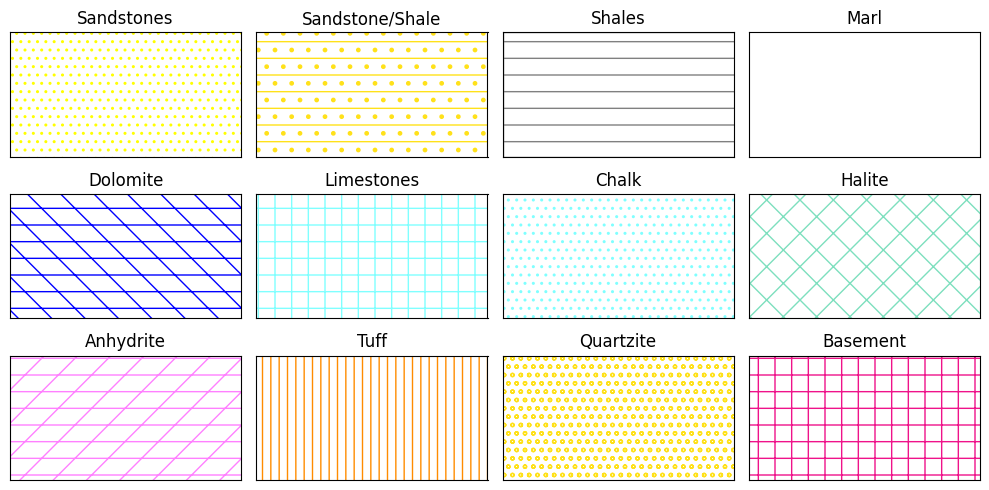

In [414]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=3, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
  ax.plot(x, y)
  if lithology_numbers[key]['lith'] == 'Shales':
    ax.fill_betweenx(y, 0, 1, facecolor='none', edgecolor='gray', hatch='_-_')

  else:
      # ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.fill_betweenx(y, 0, 1, facecolor='none',
                    edgecolor=lithology_numbers[key]['color'],         # Hatch color
                    hatch=lithology_numbers[key]['hatch'],  # e.g., '--', '..', 'xx'
                    linewidth=0.5              # Controls hatch thickness
  )

  ax.set_xlim(0, 0.1)
  ax.set_ylim(0, 1)
  ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

### Step 1, 2, 3

Step 1. Decompaction (decompacted thickness).

Step 2. Correction for paleobathymetry and eustasy (Decompacted depth with corrction).

Step 3. Removal effect of sediment load (porosity, density).



In [415]:
import numpy as np
from scipy.special import lambertw

def decomp_func(y1, y2, y1_d, phi, c):  # возвращает фун-ию одной переменной, для которой затем подбирается параметр y2_d

    y2_d = (np.exp(-np.log(e) * y1_d * c) * phi * np.log(e) - \
            np.exp(-np.log(e) * y1 * c) * phi * np.log(e) + \
            np.exp(-np.log(e) * y2 * c) * phi * np.log(e) - \
            np.log(e) * y1 * c + np.log(e) * y1_d * c + np.log(e) * y2 * c + \
            lambertw(-np.log(e) * phi * np.exp(-np.exp(-np.log(e) * y1_d * c) * phi * np.log(e) +\
                                               np.exp(-np.log(e) * y1 * c) * phi * np.log(e) - \
                                               np.exp(-np.log(e) * y2 * c) * phi * np.log(e) + \
                                               np.log(e) * y1 * c - \
                                               np.log(e) * y1_d * c - np.log(e) * y2 * c))) / c / np.log(e)
    return y2_d.real

In [416]:
#считает скорректированную декомпактированную глубину
def corrected(depth, RoMantle, RoWater, sea_level, sea_level_today):
  return depth - sea_level_today * (RoWater / (RoMantle - RoWater)) + (sea_level - sea_level_today)

In [417]:
### the averaeg porosity of a stratigraphic unit at any depth [A.58.6]
def porosity_func(surface_porosity, exp_decay, y1, y2, thicknesses):
  return surface_porosity/exp_decay*((np.exp(-exp_decay*y1) - np.exp(-exp_decay*y2))/thicknesses)

In [418]:
def bulk_density(porosity, RoGrain, RoWater):
  return porosity*RoWater + (1-porosity)*RoGrain

In [419]:
def bulk_density_column(porosity, RoGrain, RoWater):
  return porosity*RoWater + (1-porosity)*RoGrain

In [420]:
def tectonic_subsidence (RoMantle, RoWater, RoColumn, depth):
  return depth*((RoMantle-RoColumn)/(RoMantle-RoWater))

In [421]:
work_layers_copy

,Well,Event_name,Event_type,Lithology_type,Age (Ma),"Depth top, m","Depth bottom, m","Thickness, m","D Thickness (erosion), m","Paleobathymetry, Ma","Sea level, m",Sublayers,N sublayers,PSE,Kinetic,"TOC initial, %","HI initial, %"
0,Test_well,Layer 10_1,Erosion,Shales,0.0,0.00,0.20,200.0,NaN,300,0,On,1,NaN,NaN,NaN,NaN
1,Test_well,Layer 9_1,Deposition,Sandstones,45.0,0.20,0.45,250.0,NaN,325,40,On,1,NaN,NaN,NaN,NaN
2,Test_well,Layer 8_1,Deposition,Shales,55.0,0.45,1.20,750.0,NaN,350,50,On,1,NaN,NaN,NaN,NaN
3,Test_well,Layer 7_1,Deposition,Chalk,80.0,1.20,2.50,1300.0,NaN,300,100,On,1,NaN,NaN,NaN,NaN
4,Test_well,Layer 6_1,Deposition,Sandstones,100.0,2.50,3.40,900.0,NaN,200,80,On,1,NaN,NaN,NaN,NaN
5,Test_well,Layer 5_1,Deposition,Limestones,125.0,3.40,3.60,200.0,NaN,20,70,On,1,Source Rock,Tegelaar(1994)_TI-S(Spain),10.0,100.0
6,Test_well,Layer 4_1,Deposition,Dolomite,145.0,3.60,4.00,400.0,NaN,20,-40,On,1,NaN,NaN,NaN,NaN
7,Test_well,Layer 3_1,Deposition,Sandstones,160.0,4.00,4.25,250.0,NaN,10,-20,On,1,NaN,NaN,NaN,NaN
8,Test_well,Layer 2_1,Deposition,Anhydrite,210.0,4.25,5.00,750.0,NaN,20,0,On,1,NaN,NaN,NaN,NaN
9,Test_well,Layer 1_1,Deposition,Quartzite,245.0,5.00,5.40,400.0,NaN,0,0,On,1,NaN,NaN,NaN,NaN


In [ ]:
# initial_depth_values = []

# decompaction_df = pd.DataFrame() ### <-- Decompacted thicknesses (km). Table A58.3
# decompaction_corrected_df = pd.DataFrame() ### <-- Decompacted thicknesses (km). Table A58.4
# porosity_df = pd.DataFrame() ### <-- Porosities as a function of time for 10 lithological units undergoing progressive compaction during burial.
#                             ### Table A58.4
# density_df = pd.DataFrame()
# density_column_df = pd.DataFrame()


# age_list = list(work_layers['Age (Ma)'])
# print(age_list)
# # age_list.append(list(df_well['Age (Ma)'])[-1])
# # print(age_list)


# for i, age in enumerate(age_list, start=0):

#     work_layers_copy = work_layers.copy()

#     thinkness_list = []
#     thinkness_corrected_list = []
#     porosity_average_list = []
#     porosity_test = []
#     density_list = []
#     density_column = []
#     density_column_total = []


#     print('Age', i, age)

#     RoWater, RoMantle = 1000, 3300

# ### расчет corrected_decompaction for Fundament (not in work_layer)
#     if int(age) == age_list[-1]:
#       depth = 0
#       y2_d_corrected = abs(np.round(corrected(depth, RoMantle, RoWater, sea_level, sea_level_today), 3))
#       thinkness_corrected_list.append(y2_d_corrected)

# ### расчет для слоев с заданной литологией (work_layers)
#     for row_index, row in enumerate(work_layers_copy[i::].itertuples(), start=i):

#       print(row_index, row)

#       lithology = work_layers_copy.at[row.Index, 'Lithology_type']
#       layers_name = work_layers_copy.at[row.Index, 'Event_name']

#       sea_level = work_layers_copy.loc[work_layers_copy['Lithology_type'] == str(lithology), 'Paleobathymetry, Ma'].iloc[0]/1000
#       sea_level_today = work_layers_copy.loc[work_layers_copy['Lithology_type'] == str(lithology), 'Sea level, m'].iloc[0]/1000


#       phi0 = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'Porosity'].iloc[0]
#       c = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'Exp_decay, km-1'].iloc[0]
#       RoGrain = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'Grain density'].iloc[0]

#       # print(row_index, lithology, layers_name, phi0, sea_level)

#       # y1 = df_well.loc[df_well['Event_name'] == str(layers_name), 'Depth top, m'].iloc[0]
#       # y2 = df_well.loc[df_well['Event_name'] == str(layers_name), 'Depth bottom, m'].iloc[0]

#       y1 = work_layers_copy.loc[work_layers_copy['Event_name'] == str(layers_name), 'Depth top, m'].iloc[0]
#       y2 = work_layers_copy.loc[work_layers_copy['Event_name'] == str(layers_name), 'Depth bottom, m'].iloc[0]

#       if int(age) == 0:
#         initial_depth_values.append(y1)

#       if row_index == i: #<--- если первый слов, то y1 decompaced = 0
#         y1_d = 0
#         if age == 0:
#           pass
#         else:
#           y1_d_corrected = corrected(y1_d, RoMantle, RoWater, sea_level, sea_level_today)
#           thinkness_corrected_list.append(y1_d_corrected)

#       else:
#         y1_d = y2_d
#         y1_d_corrected = y2_d_corrected


# ### decompaction depth
#       y2_d = decomp_func(y1, y2, y1_d, phi0, c)
#       thicknesses = y2_d - y1_d #A58.3
#       thinkness_list.append(np.round(thicknesses, 3))
#       # print(row_index, lithology, layers_name, phi0, c, RoGrain, thicknesses)
# ### corrected decompaction depth
#       y2_d_corrected = corrected(y2_d, RoMantle, RoWater, sea_level, sea_level_today)
#       thinkness_corrected_list.append(y2_d_corrected)
# ### porosity
#       porosity = np.round(porosity_func(phi0, c, y1_d, y2_d, thicknesses), 3)
#       porosity_average_list.append(np.round(porosity, 3))

# ### Density
#       density = bulk_density(porosity, RoGrain, RoWater)
#       density_list.append(int(np.round(density, 2)))

#       # print(row_index, lithology, layers_name, phi0, c, density)

# ### Density of entire sediment column [A58.5]
#       a = (porosity*RoWater + (1-porosity)*RoGrain)*thicknesses
#       density_column.append(a)

#     if int(age) == age_list[-1]:
#       pass
#       density_col = 0
#       density_column_total.append(density_col)
#     else:
#       density_col = sum(density_column)/sum(thinkness_list)
#       density_column_total.append(np.round(density_col, 3))
#       # print(sum(thinkness_list), density_col, end='\n\n')


#  ### Save results in table
#     new_col_name = f'{age}'

#     ### Save result for decompaction in table
#     resized_list_new = np.zeros(work_layers_copy.shape[0])
#     resized_list_new[len(resized_list_new) - len(thinkness_list):] = thinkness_list


#     # resized_list = np.zeros(work_layers_copy.shape[0])
#     # resized_list[:len(thinkness_list)] = thinkness_list

#     new_col_values = resized_list_new
#     decompaction_df[new_col_name] = new_col_values

#     # ### Save result for corrected decompaction in table
#     resized_list_new = np.zeros(work_layers_copy.shape[0])
#     resized_list_new[len(resized_list_new) - len(thinkness_corrected_list):] = thinkness_corrected_list

#     new_col_values_new = resized_list_new
#     decompaction_corrected_df[new_col_name] = new_col_values_new

#     ### Save result for average porosity in table
#     resized_list = np.zeros(work_layers_copy.shape[0])
#     resized_list[len(resized_list) - len(porosity_average_list):] = porosity_average_list
#     new_col_values = resized_list
#     porosity_df[new_col_name] = new_col_values

# ### Save result for the bulk density in table
#     resized_list = np.zeros(work_layers_copy.shape[0])
#     resized_list[len(resized_list) - len(density_list):] = density_list
#     new_col_values = resized_list
#     density_df[new_col_name] = new_col_values

# ### Save result for the bulk density of column
#     density_column_df[new_col_name] = density_column_total

In [422]:
import numpy as np
import pandas as pd

# Initialize result DataFrames
decompaction_df = pd.DataFrame()
decompaction_corrected_df = pd.DataFrame()
porosity_df = pd.DataFrame()
density_df = pd.DataFrame()
density_column_df = pd.DataFrame()

# Prepare age list
age_list = list(work_layers['Age (Ma)'].unique())
age_list.append(df_well['Age (Ma)'].iloc[-1])

# Constants
RoWater, RoMantle = 1000, 3300

for i, age in enumerate(age_list):
    print(f'\nProcessing age {i}: {age} Ma')

    # Make a copy of work layers for this iteration
    if age == 0:
        # For present day (0 Ma), use all layers
        work_layers_copy = work_layers.copy()
    else:
        # For other ages, only use layers from current age and below
        i -= 1
        work_layers_copy = work_layers.iloc[i::].copy()
        # print(work_layers_copy)


    work_layers_copy = work_layers.copy()

    # Initialize lists for this age
    thickness_list = []
    thickness_corrected_list = []
    porosity_list = []
    density_list = []
    density_column_values = []


    # Process each layer
    for row_index, row in work_layers_copy.iloc[i:].iterrows():
        try:
            lithology = row['Lithology_type']
            layers_name = row['Event_name']

            # Safely get lithology parameters with defaults
            lith_mask = (work_layers_copy['Lithology_type'] == str(lithology))
            PWD = work_layers_copy.loc[lith_mask, 'Paleobathymetry, Ma'].iloc[0]/1000 if lith_mask.any() else 0
            eustatic = work_layers_copy.loc[lith_mask, 'Sea level, m'].iloc[0]/1000 if lith_mask.any() else 0

            const_mask = (df_constast['Lithology_type'] == str(lithology))
            if const_mask.any():
                phi0 = df_constast.loc[const_mask, 'Porosity'].values[0]
                c = df_constast.loc[const_mask, 'Exp_decay, km-1'].values[0]
                RoGrain = df_constast.loc[const_mask, 'Grain density'].values[0]

            y1 = row['Depth top, m']
            y2 = row['Depth bottom, m']

            # Decompaction calculations
            if row_index == i:  # First layer
                y1_d = PWD
                if age != 0:
                    y1_d_corrected = corrected(y1_d, RoMantle, RoWater, PWD, eustatic)
                    thickness_corrected_list.append(y1_d_corrected)
            else:  # Subsequent layers
                y1_d = y2_d
                y1_d_corrected = y2_d_corrected

            # Core calculations
            if age == 0:
                y2_d = y2 + 0.3
                thickness = y2_d - y1_d
                thickness_list.append(np.round(thickness, 3))

                y2_d_corrected = y2_d
                thickness_corrected_list.append(np.round(y2_d_corrected, 3))

                # Handle the basement case
            elif age == age_list[-1]:
                # depth = 0
                y2_d = y1_d
                y2_d_corrected = abs(np.round(corrected(depth, RoMantle, RoWater, 0, 0), 3))
                thickness_corrected_list.append(y2_d_corrected)

            else:
                # y1_d = PWD
                y2_d = decomp_func(y1, y2, y1_d, phi0, c)
                thickness = y2_d - y1_d
                thickness_list.append(np.round(thickness, 3))

                y2_d_corrected = corrected(y2_d, RoMantle, RoWater, PWD, eustatic)
                thickness_corrected_list.append(np.round(y2_d_corrected, 3))

            porosity = np.round(porosity_func(phi0, c, y1_d, y2_d, thickness), 3)
            porosity_list.append(porosity)

            density = int(np.round(bulk_density(porosity, RoGrain, RoWater), 2))
            density_list.append(density)

            density_column = (porosity*RoWater + (1-porosity)*RoGrain)*thickness
            density_column_values.append(density_column)

            print(lithology, layers_name, phi0, c, porosity, y2_d_corrected)

        except Exception as ex:
            print(f"Error processing row {row_index} (Lithology: {lithology}): {str(ex)}")
            continue

    # Calculate average density for the column
    if age != age_list[-1] and thickness_list:
        density_col = sum(density_column_values)/sum(thickness_list)
        density_column_total = np.round(density_col, 3)
    else:
        density_col = 0
        density_column_total = 0

    # Store results in the desired format
    new_col_name = f'{age}'

    # Decompaction results
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(thickness_list):] = thickness_list
    decompaction_df[new_col_name] = resized_list

    # Corrected decompaction
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(thickness_corrected_list):] = thickness_corrected_list
    decompaction_corrected_df[new_col_name] = resized_list

    # Porosity
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(porosity_list):] = porosity_list
    porosity_df[new_col_name] = resized_list

    # Density
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(density_list):] = density_list
    density_df[new_col_name] = resized_list

    # Column density
    density_column_df[new_col_name] = [density_column_total]


Processing age 0: 0.0 Ma
Shales Layer 10_1 0.63 0.51 0.514 0.5
Sandstones Layer 9_1 0.49 0.27 0.414 0.75
Shales Layer 8_1 0.63 0.51 0.357 1.5
Chalk Layer 7_1 0.7 0.71 0.158 2.8
Sandstones Layer 6_1 0.49 0.27 0.204 3.6999999999999997
Limestones Layer 5_1 0.4 0.6 0.041 3.9
Dolomite Layer 4_1 0.2 0.6 0.017 4.3
Sandstones Layer 3_1 0.49 0.27 0.148 4.55
Anhydrite Layer 2_1 0.05 0.2 0.019 5.3
Quartzite Layer 1_1 0.2 0.3 0.038 5.7
Error processing row 10 (Lithology: nan): cannot convert float NaN to integer

Processing age 1: 45.0 Ma
Shales Layer 10_1 0.63 0.51 0.518 0.7665211773022034
Sandstones Layer 9_1 0.49 0.27 0.418 0.9710438322658068
Shales Layer 8_1 0.63 0.51 0.37 1.6990305537787762
Chalk Layer 7_1 0.7 0.71 0.171 2.8182587294578094
Sandstones Layer 6_1 0.49 0.27 0.212 3.8188616111672573
Limestones Layer 5_1 0.4 0.6 0.045 3.6699303081103345
Dolomite Layer 4_1 0.2 0.6 0.019 4.2270368517781565
Sandstones Layer 3_1 0.49 0.27 0.155 4.665381445841913
Anhydrite Layer 2_1 0.05 0.2 0.019 5.16

<ipython-input-417-51675755b749>:3: RuntimeWarning: invalid value encountered in scalar divide
  return surface_porosity/exp_decay*((np.exp(-exp_decay*y1) - np.exp(-exp_decay*y2))/thicknesses)
<ipython-input-417-51675755b749>:3: RuntimeWarning: invalid value encountered in scalar divide
  return surface_porosity/exp_decay*((np.exp(-exp_decay*y1) - np.exp(-exp_decay*y2))/thicknesses)


ValueError: could not broadcast input array from shape (12,) into shape (1,)

In [423]:
import numpy as np
import pandas as pd

# Initialize result DataFrames
decompaction_df = pd.DataFrame()
decompaction_corrected_df = pd.DataFrame()
porosity_df = pd.DataFrame()
density_df = pd.DataFrame()
density_column_df = pd.DataFrame()

# Prepare age list
age_list = list(work_layers['Age (Ma)'].unique())
age_list.append(df_well['Age (Ma)'].iloc[-1])

# Constants
RoWater, RoMantle = 1000, 3300

for i, age in enumerate(age_list):
    print(f'\nProcessing age {i}: {age} Ma')

    # Make a copy of work layers for this iteration
    if age == 0:
        # For present day (0 Ma), use all layers
        work_layers_copy = work_layers.copy()
    else:
        # For other ages, only use layers from current age and below
        work_layers_copy = work_layers.iloc[i:].copy() if i > 0 else work_layers.copy()

    # Initialize lists for this age
    thickness_list = []
    thickness_corrected_list = []
    porosity_list = []
    density_list = []
    density_column_values = []

    # Process each layer
    for row_index, row in work_layers_copy.iterrows():
        try:
            lithology = row['Lithology_type']
            if pd.isna(lithology):
                continue

            layers_name = row['Event_name']

            # Safely get lithology parameters with defaults
            lith_mask = (work_layers_copy['Lithology_type'] == str(lithology))
            PWD = work_layers_copy.loc[lith_mask, 'Paleobathymetry, Ma'].iloc[0]/1000 if lith_mask.any() else 0
            eustatic = work_layers_copy.loc[lith_mask, 'Sea level, m'].iloc[0]/1000 if lith_mask.any() else 0

            const_mask = (df_constast['Lithology_type'] == str(lithology))
            if const_mask.any():
                phi0 = df_constast.loc[const_mask, 'Porosity'].values[0]
                c = df_constast.loc[const_mask, 'Exp_decay, km-1'].values[0]
                RoGrain = df_constast.loc[const_mask, 'Grain density'].values[0]
            else:
                continue

            y1 = row['Depth top, m']
            y2 = row['Depth bottom, m']

            # Decompaction calculations
            if row_index == work_layers_copy.index[0]:  # First layer
                y1_d = PWD
                if age != 0:
                    y1_d_corrected = corrected(y1_d, RoMantle, RoWater, PWD, eustatic)
                    thickness_corrected_list.append(y1_d_corrected)
            else:  # Subsequent layers
                y1_d = y2_d
                if age != 0:
                    y1_d_corrected = y2_d_corrected

            # Core calculations
            if age == 0:
                y2_d = y2 + 0.3
                thickness = y2_d - y1_d
                thickness_list.append(np.round(thickness, 3))

                y2_d_corrected = y2_d
                thickness_corrected_list.append(np.round(y2_d_corrected, 3))

            elif age == age_list[-1]:
                # Basement case
                y2_d = y2
                y2_d_corrected = abs(np.round(corrected(y2_d, RoMantle, RoWater, 0, 0), 3))
                thickness = y2_d - y1_d
                thickness_list.append(np.round(thickness, 3))
                thickness_corrected_list.append(y2_d_corrected)
            else:
                y2_d = decomp_func(y1, y2, y1_d, phi0, c)
                thickness = y2_d - y1_d
                thickness_list.append(np.round(thickness, 3))

                y2_d_corrected = corrected(y2_d, RoMantle, RoWater, PWD, eustatic)
                thickness_corrected_list.append(np.round(y2_d_corrected, 3))

            porosity = np.round(porosity_func(phi0, c, y1_d, y2_d, thickness), 3)
            porosity_list.append(porosity)

            density = np.round(bulk_density(porosity, RoGrain, RoWater), 2)
            density_list.append(density)

            density_column = (porosity*RoWater + (1-porosity)*RoGrain)*thickness
            density_column_values.append(density_column)

            print(lithology, layers_name, phi0, c, porosity, y2_d_corrected)

        except Exception as ex:
            print(f"Error processing row {row_index} (Lithology: {lithology}): {str(ex)}")
            continue

    # Calculate average density for the column
    if age != age_list[-1] and thickness_list:
        density_col = sum(density_column_values)/sum(thickness_list)
        density_column_total = np.round(density_col, 3)
    else:
        density_col = 0
        density_column_total = 0

    # Store results in the desired format
    new_col_name = f'{age}'

    # Ensure all lists have the same length as work_layers_copy
    # num_layers = len(work_layers_copy)
    num_layers = len(age_list)
    # print(num_layers)

    # Decompaction results
    resized_thickness = np.zeros(num_layers)
    resized_thickness[-len(thickness_list):] = thickness_list[:num_layers]
    decompaction_df[new_col_name] = resized_thickness

    # Corrected decompaction
    resized_corrected = np.zeros(num_layers)
    resized_corrected[-len(thickness_corrected_list):] = thickness_corrected_list[:num_layers]
    decompaction_corrected_df[new_col_name] = resized_corrected

    # Porosity
    resized_porosity = np.zeros(num_layers)
    resized_porosity[-len(porosity_list):] = porosity_list[:num_layers]
    porosity_df[new_col_name] = resized_porosity

    # Density
    resized_density = np.zeros(num_layers)
    resized_density[-len(density_list):] = density_list[:num_layers]
    density_df[new_col_name] = resized_density

    # Column density
    density_column_df[new_col_name] = [density_column_total]


Processing age 0: 0.0 Ma
Shales Layer 10_1 0.63 0.51 0.514 0.5
Sandstones Layer 9_1 0.49 0.27 0.414 0.75
Shales Layer 8_1 0.63 0.51 0.357 1.5
Chalk Layer 7_1 0.7 0.71 0.158 2.8
Sandstones Layer 6_1 0.49 0.27 0.204 3.6999999999999997
Limestones Layer 5_1 0.4 0.6 0.041 3.9
Dolomite Layer 4_1 0.2 0.6 0.017 4.3
Sandstones Layer 3_1 0.49 0.27 0.148 4.55
Anhydrite Layer 2_1 0.05 0.2 0.019 5.3
Quartzite Layer 1_1 0.2 0.3 0.038 5.7

Processing age 1: 45.0 Ma
Sandstones Layer 9_1 0.49 0.27 0.434 0.8361881226132991
Shales Layer 8_1 0.63 0.51 0.394 1.5697532229994087
Chalk Layer 7_1 0.7 0.71 0.184 2.7300646977582583
Sandstones Layer 6_1 0.49 0.27 0.217 3.7363015646522224
Limestones Layer 5_1 0.4 0.6 0.047 3.5878439513389293
Dolomite Layer 4_1 0.2 0.6 0.02 4.1453349630720755
Sandstones Layer 3_1 0.49 0.27 0.158 4.584689302470086
Anhydrite Layer 2_1 0.05 0.2 0.02 5.08687859005169
Quartzite Layer 1_1 0.2 0.3 0.041 5.466530978442724

Processing age 2: 55.0 Ma
Shales Layer 8_1 0.63 0.51 0.435 1.40366

ValueError: could not broadcast input array from shape (0,) into shape (12,)

In [442]:
import numpy as np
import pandas as pd

# Initialize result DataFrames
decompaction_df = pd.DataFrame()
decompaction_corrected_df = pd.DataFrame()
porosity_df = pd.DataFrame()
density_df = pd.DataFrame()
density_column_df = pd.DataFrame()

# Prepare age list
age_list = list(work_layers['Age (Ma)'].unique())
# age_list.append(df_well['Age (Ma)'].iloc[-1])

# Constants
RoWater, RoMantle = 1000, 3300

for i, age in enumerate(age_list):
    print(f'\nProcessing age {i}: {age} Ma')

    # Make a copy of work layers for this iteration
    work_layers_copy = work_layers.copy()

    # Initialize lists for this age
    thickness_list = []
    thickness_corrected_list = []
    porosity_list = []
    density_list = []
    density_column_values = []

    # Handle the basement case
    if age == age_list[-1]:
        depth = 0
        y2_d_corrected = abs(np.round(corrected(depth, RoMantle, RoWater, 0, 0), 3))
        thickness_corrected_list.append(y2_d_corrected)

    # Process each layer
    for row_index, row in work_layers_copy.iloc[i:].iterrows():
        try:
            lithology = row['Lithology_type']
            layers_name = row['Event_name']

            # Safely get lithology parameters with defaults
            lith_mask = (work_layers_copy['Lithology_type'] == str(lithology))
            PWD = work_layers_copy.loc[lith_mask, 'Paleobathymetry, Ma'].iloc[0]/1000 if lith_mask.any() else 0
            eustatic = work_layers_copy.loc[lith_mask, 'Sea level, m'].iloc[0]/1000 if lith_mask.any() else 0

            const_mask = (df_constast['Lithology_type'] == str(lithology))
            if const_mask.any():
                phi0 = df_constast.loc[const_mask, 'Porosity'].values[0]
                c = df_constast.loc[const_mask, 'Exp_decay, km-1'].values[0]
                RoGrain = df_constast.loc[const_mask, 'Grain density'].values[0]

            y1 = row['Depth top, m']
            y2 = row['Depth bottom, m']

            # Decompaction calculations
            if row_index == i:  # First layer
                y1_d = 0
                if age != 0:
                    y1_d_corrected = corrected(y1_d, RoMantle, RoWater, PWD, eustatic)
                    thickness_corrected_list.append(y1_d_corrected)
            else:  # Subsequent layers
                y1_d = y2_d
                y1_d_corrected = y2_d_corrected

            # Core calculations
            if age == 0:
                y2_d = y2 + 0.3
                thickness = y2_d - y1_d
                thickness_list.append(np.round(thickness, 3))

                y2_d_corrected = y2_d
                thickness_corrected_list.append(np.round(y2_d_corrected, 3))
            else:
                y2_d = decomp_func(y1, y2, y1_d, phi0, c)
                thickness = y2_d - y1_d
                thickness_list.append(np.round(thickness, 3))

                y2_d_corrected = corrected(y2_d, RoMantle, RoWater, PWD, eustatic)
                thickness_corrected_list.append(np.round(y2_d_corrected, 3))

            porosity = np.round(porosity_func(phi0, c, y1_d, y2_d, thickness), 3)
            porosity_list.append(porosity)

            density = int(np.round(bulk_density(porosity, RoGrain, RoWater), 2))
            density_list.append(density)

            density_column = (porosity*RoWater + (1-porosity)*RoGrain)*thickness
            density_column_values.append(density_column)

            print(lithology, layers_name, phi0, c, porosity, y2_d_corrected)

        except Exception as ex:
            print(f"Error processing row {row_index} (Lithology: {lithology}): {str(ex)}")
            continue

    # Calculate average density for the column
    if age != age_list[-1] and thickness_list:
        density_col = sum(density_column_values)/sum(thickness_list)
        density_column_total = np.round(density_col, 3)
    else:
        density_col = 0
        density_column_total = 0

    # Store results in the desired format
    new_col_name = f'{age}'

    # Decompaction results
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(thickness_list):] = thickness_list
    decompaction_df[new_col_name] = resized_list

    # Corrected decompaction
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(thickness_corrected_list):] = thickness_corrected_list
    decompaction_corrected_df[new_col_name] = resized_list

    # Porosity
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(porosity_list):] = porosity_list
    porosity_df[new_col_name] = resized_list

    # Density
    resized_list = np.zeros(work_layers_copy.shape[0])
    resized_list[len(resized_list) - len(density_list):] = density_list
    density_df[new_col_name] = resized_list

    # Column density
    density_column_df[new_col_name] = [density_column_total]


Processing age 0: 0.0 Ma
Shales Layer 10_1 0.63 0.51 0.556 0.5
Sandstones Layer 9_1 0.49 0.27 0.414 0.75
Shales Layer 8_1 0.63 0.51 0.357 1.5
Chalk Layer 7_1 0.7 0.71 0.158 2.8
Sandstones Layer 6_1 0.49 0.27 0.204 3.6999999999999997
Limestones Layer 5_1 0.4 0.6 0.041 3.9
Dolomite Layer 4_1 0.2 0.6 0.017 4.3
Sandstones Layer 3_1 0.49 0.27 0.148 4.55
Anhydrite Layer 2_1 0.05 0.2 0.019 5.3
Quartzite Layer 1_1 0.2 0.3 0.038 5.7
Error processing row 10 (Lithology: nan): cannot convert float NaN to integer

Processing age 1: 45.0 Ma
Sandstones Layer 9_1 0.49 0.27 0.473 0.5290830462071514
Shales Layer 8_1 0.63 0.51 0.453 1.36158004235496
Chalk Layer 7_1 0.7 0.71 0.213 2.5481700969701375
Sandstones Layer 6_1 0.49 0.27 0.228 3.5666660576986455
Limestones Layer 5_1 0.4 0.6 0.052 3.419266149605397
Dolomite Layer 4_1 0.2 0.6 0.022 3.9776110015009283
Sandstones Layer 3_1 0.49 0.27 0.165 4.419135740953499
Anhydrite Layer 2_1 0.05 0.2 0.02 4.921828742296417
Quartzite Layer 1_1 0.2 0.3 0.043 5.302352

<ipython-input-417-51675755b749>:3: RuntimeWarning: invalid value encountered in scalar divide
  return surface_porosity/exp_decay*((np.exp(-exp_decay*y1) - np.exp(-exp_decay*y2))/thicknesses)
<ipython-input-417-51675755b749>:3: RuntimeWarning: invalid value encountered in scalar divide
  return surface_porosity/exp_decay*((np.exp(-exp_decay*y1) - np.exp(-exp_decay*y2))/thicknesses)
<ipython-input-417-51675755b749>:3: RuntimeWarning: invalid value encountered in scalar divide
  return surface_porosity/exp_decay*((np.exp(-exp_decay*y1) - np.exp(-exp_decay*y2))/thicknesses)
<ipython-input-417-51675755b749>:3: RuntimeWarning: invalid value encountered in scalar divide
  return surface_porosity/exp_decay*((np.exp(-exp_decay*y1) - np.exp(-exp_decay*y2))/thicknesses)
<ipython-input-417-51675755b749>:3: RuntimeWarning: invalid value encountered in scalar divide
  return surface_porosity/exp_decay*((np.exp(-exp_decay*y1) - np.exp(-exp_decay*y2))/thicknesses)
<ipython-input-417-51675755b749>:3:

#### Function to save to csv

In [443]:
# File save
def save_to_csv(pd_name, work_layers, output_filename):
    work_layers.reset_index(drop=True, inplace=True)
    pd_name['Event_name'] = work_layers['Event_name']
    pd_name['Lithology_type'] = work_layers['Lithology_type']
    pd_name = pd_name[pd_name.columns[::-1]]

    return pd_name.to_csv(str(output_filename), index=True)

In [444]:
save_to_csv(porosity_df, work_layers, "Porosity-2.csv")

In [445]:
decompaction_df.loc['Stratigraphic thickness (km)', :] = decompaction_df.sum(axis=0) # <-- ввод общией мощности

### добавление колонок Lithology_typeб	Event_name
work_layers.reset_index(drop=True, inplace=True)
decompaction_df['Event_name'] = work_layers['Event_name']
decompaction_df['Lithology_type'] = work_layers['Lithology_type']
decompaction_df = decompaction_df[decompaction_df.columns[::-1]]

decompaction_df.to_csv('/content/Decompaction.csv', index=True)

In [446]:
### добавление колонок Lithology_type,	Event_name
# work_layers.reset_index(drop=True, inplace=True)
decompaction_corrected_df['Event_name'] = work_layers['Event_name']
decompaction_corrected_df['Lithology_type'] = work_layers['Lithology_type']
decompaction_corrected_df = decompaction_corrected_df[decompaction_corrected_df.columns[::-1]]

decompaction_corrected_df.to_csv('/content/Decompaction_corrected.csv', index=True)

In [447]:
### добавление колонок Lithology_type,	Event_name
work_layers.reset_index(drop=True, inplace=True)
porosity_df['Event_name'] = work_layers['Event_name']
porosity_df['Lithology_type'] = work_layers['Lithology_type']
porosity_df = porosity_df[porosity_df.columns[::-1]]

porosity_df.to_csv('/content/Porosity.csv', index=True)

In [448]:
### добавление колонок Lithology_type,	Event_name
work_layers.reset_index(drop=True, inplace=True)
density_df['Event_name'] = work_layers['Event_name']
density_df['Lithology_type'] = work_layers['Lithology_type']
density_df = density_df[density_df.columns[::-1]]

density_df.to_csv('/content/Density.csv', index=True)

In [449]:
### добавление колонок Lithology_type,	Event_name
work_layers.reset_index(drop=True, inplace=True)
density_column_df['Event_name'] = work_layers['Event_name']
density_column_df['Lithology_type'] = work_layers['Lithology_type']
density_column_df = density_column_df[density_column_df.columns[::-1]]

density_column_df.to_csv('/content/Density_column.csv', index=True)

In [450]:
decompaction_df

,Lithology_type,Event_name,260.0,245.0,210.0,160.0,145.0,125.0,100.0,80.0,55.0,45.0,0.0
0,Shales,Layer 10_1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.50
1,Sandstones,Layer 9_1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.261,0.25
2,Shales,Layer 8_1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.888,0.800,0.75
3,Chalk,Layer 7_1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.747,1.374,1.330,1.30
4,Sandstones,Layer 6_1,0.0,0.000,0.000,0.000,0.000,0.000,1.205,0.959,0.917,0.907,0.90
5,Limestones,Layer 5_1,0.0,0.000,0.000,0.000,0.000,0.300,0.232,0.205,0.201,0.201,0.20
6,Dolomite,Layer 4_1,0.0,0.000,0.000,0.000,0.474,0.459,0.423,0.404,0.401,0.401,0.40
7,Sandstones,Layer 3_1,0.0,0.000,0.000,0.392,0.356,0.339,0.293,0.260,0.253,0.251,0.25
8,Anhydrite,Layer 2_1,0.0,0.000,0.771,0.768,0.765,0.764,0.758,0.752,0.751,0.750,0.75
9,Quartzite,Layer 1_1,0.0,0.471,0.450,0.442,0.434,0.429,0.416,0.404,0.401,0.401,0.40


In [451]:
decompaction_corrected_df[0:10]

,Lithology_type,Event_name,260.0,245.0,210.0,160.0,145.0,125.0,100.0,80.0,55.0,45.0,0.0
0,Shales,Layer 10_1,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.267609,0.50
1,Sandstones,Layer 9_1,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300,0.529000,0.75
2,Shales,Layer 8_1,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.156522,1.188,1.362000,1.50
3,Chalk,Layer 7_1,0.0,0.000,0.000,0.000000,0.000000,0.000000,0.267609,1.904000,2.418,2.548000,2.80
4,Sandstones,Layer 6_1,0.0,0.000,0.000,0.000000,0.000000,-0.080435,1.472000,2.974000,3.446,3.567000,3.70
5,Limestones,Layer 5_1,0.0,0.000,0.000,0.000000,0.077391,0.220000,1.356000,2.831000,3.299,3.419000,3.90
6,Dolomite,Layer 4_1,0.0,0.000,0.000,0.267609,0.552000,0.836000,1.938000,3.393000,3.858,3.978000,4.30
7,Sandstones,Layer 3_1,0.0,0.000,0.020,0.660000,1.098000,1.366000,2.421000,3.844000,4.301,4.419000,4.55
8,Anhydrite,Layer 2_1,0.0,0.000,0.791,1.180000,1.616000,1.882000,2.932000,4.348000,4.804,4.922000,5.30
9,Quartzite,Layer 1_1,0.0,0.471,1.221,1.602000,2.029000,2.291000,3.327000,4.732000,5.185,5.302000,5.70


In [481]:
porosity_df

,Lithology_type,Event_name,260.0,245.0,210.0,160.0,145.0,125.0,100.0,80.0,55.0,45.0,0.0
0,Shales,Layer 10_1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.556
1,Sandstones,Layer 9_1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.473,0.414
2,Shales,Layer 8_1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.507,0.453,0.357
3,Chalk,Layer 7_1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.401,0.238,0.213,0.158
4,Sandstones,Layer 6_1,0.0,0.000,0.000,0.000,0.000,0.000,0.418,0.269,0.236,0.228,0.204
5,Limestones,Layer 5_1,0.0,0.000,0.000,0.000,0.000,0.366,0.181,0.074,0.056,0.052,0.041
6,Dolomite,Layer 4_1,0.0,0.000,0.000,0.000,0.174,0.146,0.075,0.031,0.023,0.022,0.017
7,Sandstones,Layer 3_1,0.0,0.000,0.000,0.465,0.411,0.381,0.285,0.193,0.171,0.165,0.148
8,Anhydrite,Layer 2_1,0.0,0.000,0.046,0.043,0.039,0.037,0.030,0.023,0.021,0.020,0.019
9,Quartzite,Layer 1_1,0.0,0.187,0.148,0.132,0.116,0.107,0.079,0.051,0.045,0.043,0.038


### Check along Depth

In [465]:
import pandas as pd

file_path = '/content/Output_template.xlsx'

data_to_check = pd.ExcelFile(file_path)
print("Available sheets:", database.sheet_names)

for sheet_name in data_to_check .sheet_names:
    clean_name = sheet_name.replace(" ", "_").replace("-", "_")
    var_name = f"{clean_name}"

    # Assign the DataFrame to a dynamically named variable
    globals()[var_name] = pd.read_excel(
        file_path,
        sheet_name=sheet_name,
        header=0
    )
    print(f"Created variable: {var_name}")

Available sheets: ['Input check', 'Depth check', 'Time check']
Created variable: Input_check
Created variable: Depth_check
Created variable: Time_check


In [468]:
Depth_check.columns

Index(['Layer', 'Lithology', 'Depth', 'Temperature', 'Unnamed: 4', 'Layer.1',
       'Lithology.1', 'Depth.1', ' Vitrinite Reflectance', 'Unnamed: 9',
       'Layer.2', 'Lithology.2', 'Depth.2', 'Porosity (effective)',
       'Unnamed: 14', 'Layer.3', 'Lithology.3', 'Depth.3',
       'Hydrostatic Pressure', 'Pore Pressure', 'Lithostatic Pressure',
       'Unnamed: 21', 'Layer.4', 'Lithology.4', 'Depth.4',
       'Vertical Thermal Conductivity'],
      dtype='object')

In [472]:
porosity_check = Depth_check[['Layer.2', 'Lithology.2', 'Depth.2', 'Porosity (effective)']]
porosity_check_cleaned = porosity_check.dropna(subset=['Porosity (effective)'])
porosity_check_cleaned

,Layer.2,Lithology.2,Depth.2,Porosity (effective)
0,Shales,Shale_allen,300.0,59.79
1,Sandstones,Sandstone_allen,500.0,45.41
2,Shales1,Shale_allen,750.0,40.49
3,Chalk,Chalk_allen,1500.0,18.49
4,Sandstones1,Sandstone_allen,2800.0,21.28
5,Limestones,Limestone_allen,3700.0,7.36
6,Dolomite,Dolomite_allen,3900.0,4.46
7,Sandstones2,Sandstone_allen,4300.0,15.16
8,Anhydrite,Anhydrite_allen,4550.0,3.99
9,Quartzite,Quartzite_allen,5300.0,18.88


In [479]:
df_well['Depth top, m'].shape


(12,)

In [501]:
depth_corrected = (df_well['Depth top, m'][1:11] + 0.3) * 1000
depth_corrected.shape

(10,)

In [496]:
porosity_df['0.0'][0:10].shape

(10,)

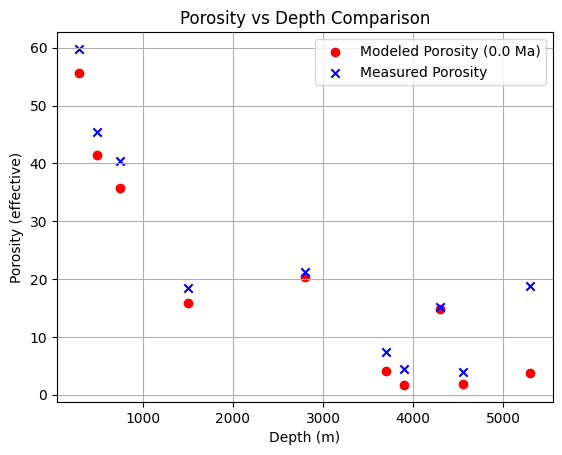

In [503]:
import matplotlib.pyplot as plt

# Ensure data alignment
x1 = depth_corrected
y1 = porosity_df['0.0'][:10] * 100

x2 = porosity_check_cleaned['Depth.2']
y2 = porosity_check_cleaned['Porosity (effective)']

# Plot with distinct styles
plt.scatter(x1, y1, color='red', marker='o', label='Modeled Porosity (0.0 Ma)')
plt.scatter(x2, y2, color='blue', marker='x', label='Measured Porosity')

# Add labels and legend
plt.xlabel('Depth (m)')
plt.ylabel('Porosity (effective)')
plt.title('Porosity vs Depth Comparison')
plt.legend()
plt.grid(True)

plt.show()

#### Plot: "Porosity - Depth" (Comparison with Petromod)

In [ ]:
# Petromod

data_ref = pd.read_excel('/content/BM/Charts_Petromod.xlsx', sheet_name='Petromod porosity', skiprows=0, header=0, engine='openpyxl')
data_ref = data_ref.applymap(lambda x: x.split('\t') if isinstance(x, str) else x)

depth_dc, porosity_plot = [],[]

# Create a sample DataFrame with shape 10x2
depth_dc = decompaction_corrected_df['0.0'].tolist()
porosity_plot = data_ref[0].tolist()

data = {
    'porosity': porosity_plot,
    'depth_dc': depth_dc
}
df = pd.DataFrame(data)

# # Repeat each column in order like 1 cell, 1 cell, 2 cell, 2 cell, 3 cell, 3 cell
# new_data = {key: [val for val in df[key] for _ in range(2)] for key in df.columns}



# Rewrite the dictionary comprehension as a list comprehension
new_data_list = [(key, [val for val in df[key] for _ in range(2)]) for key in df.columns]
new_data_list[0][1].append(0)
new_data_list[1][1].insert(0, 0)

# Display the new_data_list
print(new_data_list[0][1])

# Convert the list of tuples to a dictionary
data_dict = {key: value for key, value in new_data_list}

# Create a DataFrame from the dictionary
new_df_ref = pd.DataFrame(data_dict)

[0.5992999999999999, 0.5992999999999999, 0.4499, 0.4499, 0.41229999999999994, 0.41229999999999994, 0.2012, 0.2012, 0.225, 0.225, 0.0489, 0.0489, 0.0215, 0.0215, 0.1645, 0.1645, 0.0209, 0.0209, 0.0444, 0.0444, 0]


<ipython-input-37-5fd948905ef5>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_ref = data_ref.applymap(lambda x: x.split('\t') if isinstance(x, str) else x)


In [ ]:
# Calculated data

depth_dc, porosity_plot = [],[]

# Create a sample DataFrame with shape 10x2
# depth_dc = decompaction_corrected_df['0.0'].tolist()
depth_dc = work_layers['Depth bottom, m'].tolist()
porosity_plot = porosity_df['0.0'].tolist()

data = {
    'porosity': porosity_plot,
    'depth_dc': depth_dc
}
df = pd.DataFrame(data)

# # Repeat each column in order like 1 cell, 1 cell, 2 cell, 2 cell, 3 cell, 3 cell
# new_data = {key: [val for val in df[key] for _ in range(2)] for key in df.columns}



# Rewrite the dictionary comprehension as a list comprehension
new_data_list = [(key, [val for val in df[key] for _ in range(2)]) for key in df.columns]
new_data_list[0][1].append(0)
new_data_list[1][1].insert(0, 0)

# Display the new_data_list
print(new_data_list[0][1])

# Convert the list of tuples to a dictionary
data_dict = {key: value for key, value in new_data_list}

# Create a DataFrame from the dictionary
new_df = pd.DataFrame(data_dict)

[0.599, 0.599, 0.449, 0.449, 0.416, 0.416, 0.195, 0.195, 0.221, 0.221, 0.049, 0.049, 0.021, 0.021, 0.161, 0.161, 0.02, 0.02, 0.042, 0.042, 0]


In [ ]:
def makeplot_porosity(property, top_depth, bottom_depth):
    # fig = plt.figure(constrained_layout=True, figsize=(10, 6))
    # ax = fig.subplots(1, 2,  sharex=False)

    fig, ax = plt.subplots(figsize=(14,7))

    ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1, sharey = ax1)
    ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1, sharey = ax1)

    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
    # ax10 = ax1.twiny()
    # ax10.xaxis.set_visible(False)

    # ax13 = ax4.twiny()
    # ax13.xaxis.set_visible(False)

### Plot 1
    # Geotherma
    # ax1.plot(new_df_ref['porosity'], new_df['depth_dc'], label='Petromod', color='red')
    ax1.plot(new_df['porosity'], new_df['depth_dc'], label='BM', color='black')
    ax1.set_xlabel(f'Porosity', labelpad=20)
    ax1.set_ylabel(f'Depth (km)')
    ax1.legend(loc='upper left')
    ax1.set_xlim(0, 0.7)

### Plot 2
    # Lithology track
    # ax2.plot(T_with_rad_heat["Lithology"], T_with_rad_heat['depth 0'], color = "black", linewidth = 0.5)
    ax2.set_xlabel("Lithology")
    ax2.set_xlim(0, 1)
    ax2.xaxis.label.set_color("black")
    ax2.tick_params(axis='x', colors="black")
    ax2.spines["top"].set_edgecolor("black")
    ax2.set_xticks([0, 1])

    depth_start = 0


    for lit, depth in zip(work_layers.index, decompaction_corrected_df['0.0']):
        key = int(lit)
        color = work_layers.at[lit, 'Color']
        hatch = work_layers.at[lit, 'Index']


        depth_values = [depth_start, depth]
        depth_start = depth

        ax2.fill_betweenx(depth_values, 0, 1, facecolor=color, hatch=hatch)

    ax2.set_xticks([0, 1])

### Plot3
    ax3.set_xlabel("Lithology")
    ax3.set_xlim(0, 1)
    ax3.xaxis.label.set_color("black")
    ax3.tick_params(axis='x', colors="black")
    ax3.spines["top"].set_edgecolor("black")
    ax3.set_xticks([0, 1])

    depth_start = 0

    for lit, depth in zip(work_layers_initial["Lithology_type"],work_layers_initial['Depth bottom, m']):
        key = lit
        depth_values = [depth_start, depth]
        depth_start = depth

        label_position = (0.5, sum(depth_values) / 2)  # Assuming x position is at 0.5
        ax3.text(label_position[0], label_position[1], key, ha='center', va='center')
        ax3.plot([0, 1], [depth, depth], color='black', linewidth=1)  # Assuming black color and linewidth of 1


    for ax in [ax1, ax2, ax3]:
        ax.set_ylim(bottom_depth, top_depth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))

    for ax in [ax2]:
        plt.setp(ax.get_yticklabels(), visible = False)

    plt.tight_layout()
    fig.subplots_adjust(wspace = 0.15)
    return plt.savefig("porosity-depth.png")

In [ ]:
decompaction_corrected_df

,Lithology_type,Event_name,260,245.0,210.0,160.0,145.0,125.0,100.0,80.0,55.0,45.0,0.0
0,Shales,Layer 10_1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.267609,0.500000
1,Sandstones,Layer 9_1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.529083,0.717609
2,Shales,Layer 8_1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.156522,1.187641,1.361580,1.500000
3,Chalk,Layer 7_1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.267609,1.903843,2.417705,2.548170,2.656522
4,Sandstones,Layer 6_1,0.0,0.000000,0.000000,0.000000,0.000000,-0.080435,1.472116,2.973869,3.445561,3.566666,3.667609
5,Limestones,Layer 5_1,0.0,0.000000,0.000000,0.000000,0.077391,0.219591,1.356375,2.831266,3.298992,3.419266,3.519565
6,Dolomite,Layer 4_1,0.0,0.000000,0.000000,0.267609,0.551755,0.836214,1.937575,3.393404,3.858003,3.977611,4.077391
7,Sandstones,Layer 3_1,0.0,0.000000,0.020000,0.659675,1.098132,1.365589,2.421218,3.843656,4.301160,4.419136,4.517609
8,Anhydrite,Layer 2_1,0.0,0.000000,0.790834,1.180095,1.615685,1.881521,2.931584,4.348241,4.804223,4.921829,5.020000
9,Quartzite,Layer 1_1,0.0,0.471032,1.220818,1.601679,2.029242,2.290785,3.327406,4.732187,5.185397,5.302353,5.400000


In [ ]:
porosity_df.columns, decompaction_corrected_df.columns

(Index(['Lithology_type', 'Event_name', '260', '245.0', '210.0', '160.0',
        '145.0', '125.0', '100.0', '80.0', '55.0', '45.0', '0.0'],
       dtype='object'),
 Index(['Lithology_type', 'Event_name', '260', '245.0', '210.0', '160.0',
        '145.0', '125.0', '100.0', '80.0', '55.0', '45.0', '0.0'],
       dtype='object'))

<ipython-input-39-98802aea4069>:50: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.
  ax2.fill_betweenx(depth_values, 0, 1, facecolor=color, hatch=hatch)


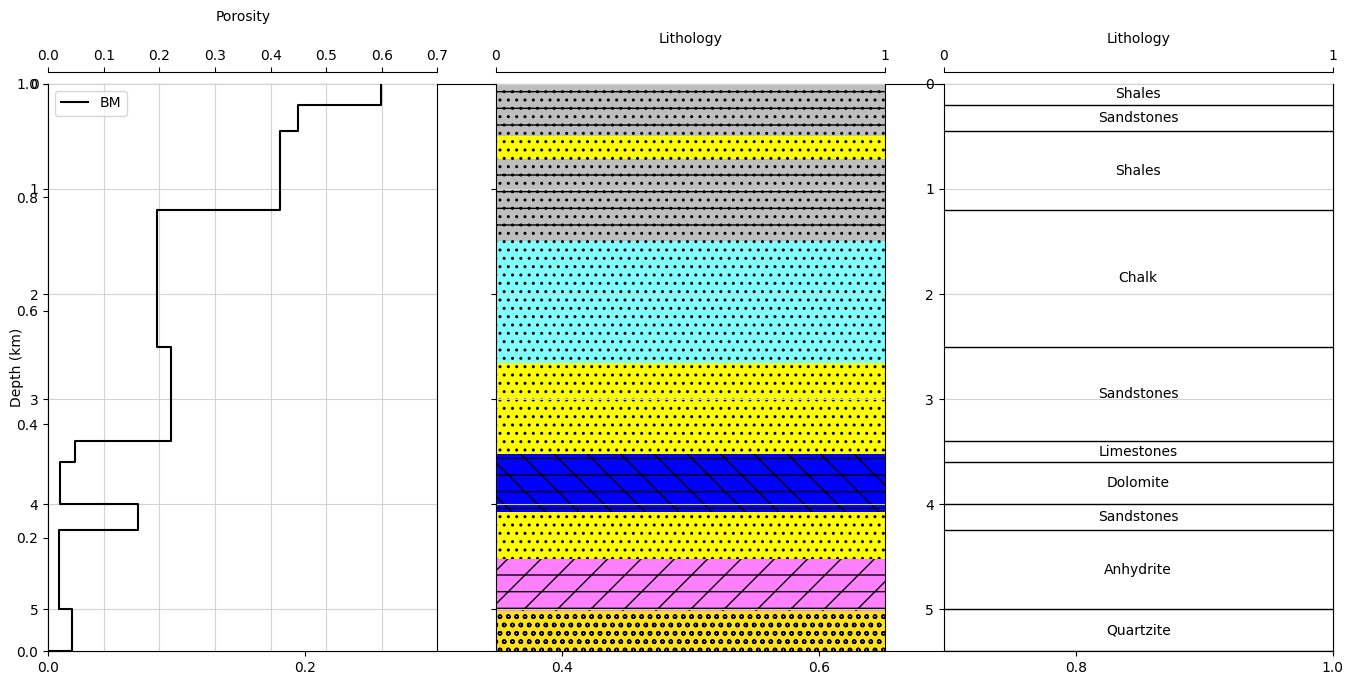

In [ ]:
makeplot_porosity(porosity_df, 0, max(decompaction_corrected_df['0.0']))

In [ ]:
def makeplot_porosity_2pic(property, top_depth, bottom_depth):
    # fig = plt.figure(constrained_layout=True, figsize=(10, 6))
    # ax = fig.subplots(1, 2,  sharex=False)

    fig, ax = plt.subplots(figsize=(8, 8))

    ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan = 1, sharey = ax1)

    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
    # ax10 = ax1.twiny()
    # ax10.xaxis.set_visible(False)

    # ax13 = ax4.twiny()
    # ax13.xaxis.set_visible(False)

### Plot 1
    # Geotherms
    # ax1.scatter(new_df_ref['porosity'], new_df['depth_dc'], label='Petromod', color='red', lw=3)
    ax1.plot(new_df['porosity'], new_df['depth_dc'], label='BM', color='black', lw=3)

    ax1.set_xlabel(f'Porosity [n/n]', labelpad=20)
    ax1.set_ylabel(f'Depth [km]')
    ax1.legend(loc='upper left')
    ax1.set_xlim(0, 0.7)

    # Lithology
    ax1.xaxis.label.set_color("black")
    ax1.tick_params(axis='x', colors="black")
    ax1.spines["top"].set_edgecolor("black")

    depth_start = 0

    for lit, depth in zip(work_layers_initial.index,work_layers_initial['Depth bottom, m']):

        key = int(lit)
        color = work_layers_initial.at[lit, 'Color']
        hatch = work_layers_initial.at[lit, 'Index']


        depth_values = [depth_start, depth]
        depth_start = depth

        ax1.fill_betweenx(depth_values, 0, 1, facecolor=color, hatch=hatch, alpha=0.2)


### Plot 2
    ax2.set_xlabel("Lithology")
    ax2.set_xlim(0, 1)
    ax2.xaxis.label.set_color("black")
    ax2.tick_params(axis='x', colors="black")
    ax2.spines["top"].set_edgecolor("black")
    ax2.set_xticks([0, 1])

    depth_start = 0

    # for lit, depth in zip(property["Lithology_type"], decompaction_corrected_df['0.0']):
    for lit, depth in zip(work_layers_initial["Lithology_type"],work_layers_initial['Depth bottom, m']):
        key = lit
        depth_values = [depth_start, depth]
        depth_start = depth

        label_position = (0.5, sum(depth_values) / 2)  # Assuming x position is at 0.5
        ax2.text(label_position[0], label_position[1], key, ha='center', va='center')
        ax2.plot([0, 1], [depth, depth], color='black', linewidth=1)  # Assuming black color and linewidth of 1


    for ax in [ax1, ax2]:
        ax.set_ylim(bottom_depth, top_depth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))

    for ax in [ax2]:
        plt.setp(ax.get_yticklabels(), visible = False)

    plt.tight_layout()
    fig.subplots_adjust(wspace = 0.15)
    return plt.savefig("porosity-depth.png")

<ipython-input-43-bb4b7ff73229>:45: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.
  ax1.fill_betweenx(depth_values, 0, 1, facecolor=color, hatch=hatch, alpha=0.2)


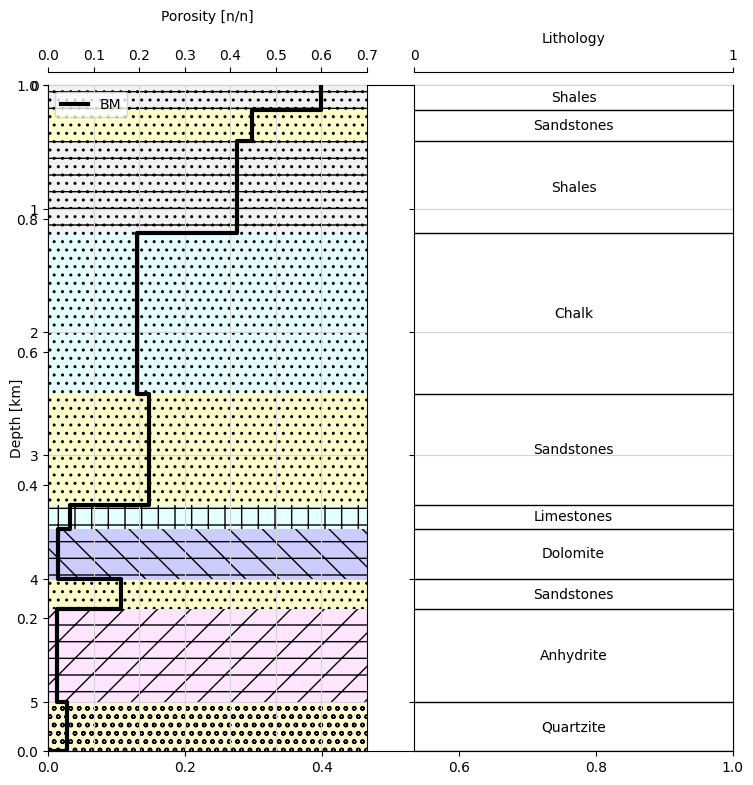

In [ ]:
makeplot_porosity_2pic(porosity_df, 0, max(decompaction_corrected_df['0.0']))

### Tectonic driving subsidence [A58.7]

In [ ]:
### Tectonic driving subsidence [A58.7]
output_df = pd.DataFrame()
RoWater, RoMantle = 1000, 3300
# y = tectonic_subsidence(RoMantle, RoWater, density_column, thicknesses)

# decompaction_corrected_df.iloc[2:]
thicknesses = decompaction_corrected_df.iloc[:, 2:decompaction_corrected_df.shape[1]]
density_column_test = density_column_df.iloc[:, 2:density_column_df.shape[1]]


# Initialize an empty list to store the output values
output_values = []


col_name = list(density_column_test.columns)

for columns2, column_name in zip(thicknesses.columns, density_column_test.columns):
  if all(item == 0 for item in density_column_test[column_name].values):
    y = tectonic_subsidence(RoMantle, RoWater,
                            np.zeros(len(density_column_test[column_name].values)),
                            np.zeros(len(thicknesses[columns2].values)))

    output_values.append(y)

  else:
      y = tectonic_subsidence(RoMantle, RoWater,
                              density_column_test[column_name].values,
                              thicknesses[columns2].values)
      output_values.append(y)

output_df = pd.DataFrame(output_values).T[::-1].rename(columns=dict(enumerate(col_name)))

In [ ]:
output_df

,260,245.0,210.0,160.0,145.0,125.0,100.0,80.0,55.0,45.0,0.0
9,0.0,0.196275,0.319325,0.550230,0.658339,0.778836,1.312422,1.938154,2.066518,2.083039,2.121120
8,0.0,0.000000,0.206856,0.405402,0.524170,0.639692,1.156298,1.780901,1.914610,1.933549,1.971856
7,0.0,0.000000,0.005231,0.226620,0.356263,0.464282,0.954996,1.574239,1.714126,1.736065,1.774517
6,0.0,0.000000,0.000000,0.091932,0.179004,0.284301,0.764234,1.389831,1.537517,1.562611,1.601599
5,0.0,0.000000,0.000000,0.000000,0.025108,0.074658,0.534992,1.159597,1.314736,1.343265,1.382485
4,0.0,0.000000,0.000000,0.000000,0.000000,-0.027347,0.580644,1.218002,1.373147,1.401171,1.440637
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.105552,0.779754,0.963520,1.001053,1.043482
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064106,0.473306,0.534899,0.589200
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119558,0.207851,0.281877
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105131,0.196400


#### Plot: "Tectonic subsidence Y after decompaction and backstripping" (Comparison with Petromod) [Fig. A58.2]


<ipython-input-47-42363abcfd51>:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


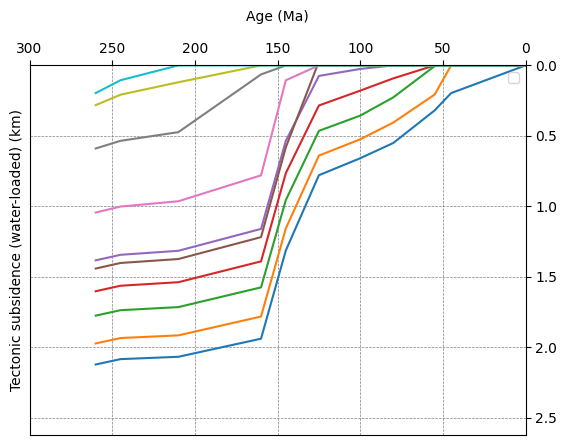

In [ ]:
age_values  = output_df.columns.astype(float).tolist()[::-1]

# work_layers_copy = work_layers.copy()

# # Plot the lines for each row in work_layers_copy
for row_index, row in output_df.iterrows():
    plt.plot(age_values, row.values)

# # Calculate sea level and sea level today
# sea_level = df_well[1:df_well.shape[0]]['Paleobathymetry, Ma'] / 1000
# sea_level_today = df_well[1:df_well.shape[0]]['Sea level, m'] / 1000

# # Plot sea level and present-day sea level
# plt.plot(age_values, (abs(sea_level - sea_level_today))[::-1], 'k--', label='Sea level')
# plt.plot(age_values, np.zeros(work_layers_copy.shape[1]), 'k--', label='present-day sea level')

# # Fill the space between the two sea level plots with blue color
# plt.fill_between(age_values, np.zeros(work_layers_copy.shape[1]),
#  (abs(sea_level - sea_level_today))[::-1], color='blue', alpha=0.2, label='Sea level' )

# Additional plotting settings
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.axis([np.round(max(age_values), -2), np.min(age_values), np.max(output_df)+0.5, 0])

plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)
plt.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=True)

# Move the x-axis label to the top
plt.xlabel(f'Age (Ma)', labelpad=20)
plt.ylabel(f'Tectonic subsidence (water-loaded) (km)')
plt.gca().xaxis.set_label_coords(0.5, 1.15)

plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

In [ ]:
# Data reference Petromod
data_ref = pd.read_excel('/content/BM/Charts_Petromod.xlsx', sheet_name='Petromod Depth', skiprows=0, header=0, engine='openpyxl')
# data_ref = data_ref.applymap(lambda x: x.split('\t') if isinstance(x, str) else x)
data_ref = data_ref.apply(lambda x: x.str.split('\t') if x.dtype == 'object' else x)

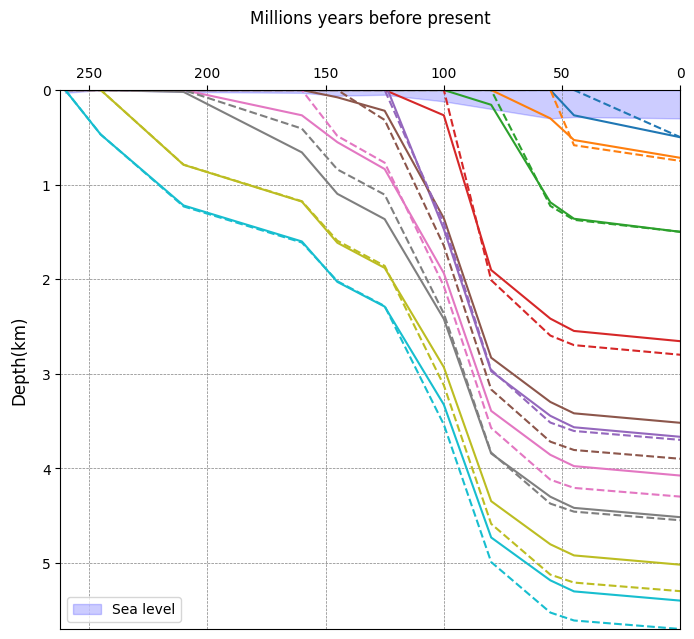

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 7))

    # Our data
work_layers = decompaction_corrected_df.drop(['Lithology_type', 'Event_name'], axis=1, inplace=False)
# age_values = [int(age.split(' Ma')[0]) for age in work_layers.columns.tolist()]
age_values = [int(float(age.split(' Ma')[0])) for age in work_layers.columns.tolist()]
work_layers_copy = work_layers.copy()

# Plot the lines for each row in work_layers_copy
for row_index, row in work_layers_copy.iterrows():
  plt.plot(age_values, row.values, linestyle='solid')

    # Petromode
work_layers = data_ref.drop(['Unnamed: 0', 'Lithology_type', 'Event_name'], axis=1, inplace=False)
work_layers_copy = work_layers.copy()

for row_index, row in work_layers_copy.iterrows():
  plt.plot(age_values, row.values, linestyle='dashed')

# Calculate sea level and sea level today
sea_level = df_well[1:df_well.shape[0]]['Paleobathymetry, Ma'] / 1000
sea_level_today = df_well[1:df_well.shape[0]]['Sea level, m'] / 1000

# # Plot sea level and present-day sea level
# plt.plot(age_values, (abs(sea_level - sea_level_today))[::-1], 'k--', label='Sea level')
# plt.plot(age_values, np.zeros(work_layers_copy.shape[1]), 'k--', label='present-day sea level')

# Fill the space between the two sea level plots with blue color
plt.fill_between(age_values, np.zeros(work_layers_copy.shape[1]),
 (abs(sea_level - sea_level_today))[::-1], color='blue', alpha=0.2, label='Sea level' )

# Additional plotting settings
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
# plt.axis([np.round(max(age_values), -2), np.min(age_values), np.max(work_layers_copy), -1])
plt.axis([262, 0, np.max(work_layers_copy), 0])

plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)
# plt.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=True)

# Move the x-axis label to the top
plt.xlabel(f'Millions years before present', labelpad=10, fontsize=12)
plt.ylabel(f'Depth(km)', labelpad=10, fontsize=12)
plt.gca().xaxis.set_label_coords(0.5, 1.15)

plt.legend(loc='lower left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()
plt.savefig("age-depth.png")

### Step 4: Thermal conductivity of the basin-fill

In [ ]:
def bulk_thermal_conductivity(tc_matrix, tc_inclusion, porosity):
  return tc_matrix*(1-porosity) + tc_inclusion*porosity

In [ ]:
def bulk_thermal_conductivity_geomean(tc_matrix, tc_inclusion, porosity):
  return tc_inclusion**porosity * tc_matrix**(1-porosity)

In [ ]:
def geotherm_constant_heat(surface_T, basal_HF, depth, tc_bulk):
  return surface_T + (-basal_HF*depth * tc_bulk**-1)

In [ ]:
tc_bulk_df = pd.DataFrame()

age_list = list(work_layers_with_color['Age (Ma)'][0:])
# age_list  = work_layers.columns.astype(float)
# age_list = work_layers.columns.tolist()
print(age_list)

for i, age in enumerate(age_list, start=0):

    work_layers_copy = work_layers_with_color.copy()
    print(age)

    tc_bulk_list = []

    # thinkness_list = []
    # thinkness_corrected_list = []
    # porosity_average_list = []
    # porosity_test = []
    # density_list = []
    # density_column = []
    # density_column_total = []

    RoWater, RoMantle = 1000, 3300
    tc_water = 0.60

    sea_level = work_layers_copy.loc[work_layers_copy['Lithology_type'] == str(lithology), 'Paleobathymetry, Ma'].iloc[0]/1000
    sea_level_today = work_layers_copy.loc[work_layers_copy['Lithology_type'] == str(lithology), 'Sea level, m'].iloc[0]/1000

    print('Age', age)

    ### расчет corrected_decompaction for Fundament (not in work_layer)
    if int(age) == age_list[-1]:
          tc_bulk = 0
          tc_bulk_list.append(tc_bulk)


### расчет для слоев с заданной литологией (work_layers)
    for row_index, row in enumerate(work_layers_copy[i::].itertuples(), start=i):

      lithology = work_layers_copy.at[row.Index, 'Lithology_type']
      layers_name = work_layers_copy.at[row.Index, 'Event_name']
      phi0 = porosity_df.loc[(porosity_df['Lithology_type'] == str(lithology)) & (porosity_df['Event_name'] == layers_name), f'{age}'].iloc[0]
      tc_matrix = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'TC matrix'].iloc[0]

      # c = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'Exp_decay, km-1'].iloc[0]
      # RoGrain = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'Grain density'].iloc[0]
      # y1 = df_well.loc[df_well['Event_name'] == str(layers_name), 'Depth top, m'].iloc[0]
      # y2 = df_well.loc[df_well['Event_name'] == str(layers_name), 'Depth bottom, m'].iloc[0]

### Bulk thermal conductivity
      # tc_bulk = bulk_thermal_conductivity(tc_matrix, tc_water, phi0)
      tc_bulk = bulk_thermal_conductivity_geomean(tc_matrix, tc_water, phi0)
      tc_bulk_list.append(tc_bulk)

      print(row_index, lithology, layers_name, phi0, tc_bulk)


### Save results in table
    new_col_name = f'{age}'
    ### Save result for decompaction in table
    resized_list_new = np.zeros(work_layers_copy.shape[0])
    resized_list_new[len(resized_list_new) - len(tc_bulk_list):] = tc_bulk_list
    new_col_values = resized_list_new
    tc_bulk_df[new_col_name] = new_col_values

[0.0, 45.0, 55.0, 80.0, 100.0, 125.0, 145.0, 160.0, 210.0, 245.0]
0.0
Age 0.0
0 Shales Layer 10_1 0.599 0.9723567362696203
1 Sandstones Layer 9_1 0.449 2.0339007353427045
2 Shales Layer 8_1 0.416 1.2120273991613346
3 Chalk Layer 7_1 0.195 2.366700025321146
4 Sandstones Layer 6_1 0.221 3.3706523489984956
5 Limestones Layer 5_1 0.049 3.0355414541771917
6 Dolomite Layer 4_1 0.021 5.062992133316692
7 Sandstones Layer 3_1 0.161 3.849875168322586
8 Anhydrite Layer 2_1 0.02 6.010585280536438
9 Quartzite Layer 1_1 0.042 6.91736141737204
45.0
Age 45.0
1 Sandstones Layer 9_1 0.473 1.9285756486360588
2 Shales Layer 8_1 0.453 1.1592201565488158
3 Chalk Layer 7_1 0.213 2.295179662645682
4 Sandstones Layer 6_1 0.228 3.3187801310059903
5 Limestones Layer 5_1 0.052 3.0200565841236457
6 Dolomite Layer 4_1 0.022 5.051974246458476
7 Sandstones Layer 3_1 0.165 3.8159071788813987
8 Anhydrite Layer 2_1 0.02 6.010585280536438
9 Quartzite Layer 1_1 0.043 6.899730500188495
55.0
Age 55.0
2 Shales Layer 8_1 0.50

In [ ]:
### добавление колонок Lithology_type,	Event_name
work_layers.reset_index(drop=True, inplace=True)
tc_bulk_df['Event_name'] = work_layers_with_color['Event_name']
tc_bulk_df['Lithology_type'] = work_layers_with_color['Lithology_type']
tc_bulk_df= tc_bulk_df[tc_bulk_df.columns[::-1]]

tc_bulk_df.to_csv('/content/TC_bulk.csv', index=True)

In [ ]:
tc_bulk_df

,Lithology_type,Event_name,245.0,210.0,160.0,145.0,125.0,100.0,80.0,55.0,45.0,0.0
0,Shales,Layer 10_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.972357
1,Sandstones,Layer 9_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.928576,2.033901
2,Shales,Layer 8_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.086252,1.159220,1.212027
3,Chalk,Layer 7_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.665822,2.199417,2.295180,2.366700
4,Sandstones,Layer 6_1,0.000000,0.000000,0.000000,0.000000,0.000000,2.178504,3.030594,3.260474,3.318780,3.370652
5,Limestones,Layer 5_1,0.000000,0.000000,0.000000,0.000000,1.768240,2.423864,2.908889,2.999533,3.020057,3.035541
6,Dolomite,Layer 4_1,0.000000,0.000000,0.000000,3.627857,3.856041,4.501078,4.953886,5.040980,5.051974,5.062992
7,Sandstones,Layer 3_1,0.000000,0.000000,1.963064,2.212554,2.364613,2.925044,3.586377,3.765516,3.815907,3.849875
8,Anhydrite,Layer 2_1,0.000000,5.654131,5.694157,5.747966,5.775061,5.870903,5.968335,5.996469,6.010585,6.010585
9,Quartzite,Layer 1_1,4.777836,5.277843,5.497812,5.726949,5.860011,6.294075,6.760291,6.864603,6.899731,6.917361


## Step 5. Calculation of the geotherm with variable thermal conductivity (a constant heat flow from the mantle)



## Step 6. The radiogenic heat contribution: Eqn. [A58.10]

In [ ]:
def linear_geotherm(G, y):
  return G*y

In [ ]:
def linear_geotherm_2(T0, qm, A, yc, depth, K):
  return T0 + ((-Qm + A*yc)/K)*depth - (A/(2*K)*depth**2)

In [ ]:
work_layers_copy_initial.columns

Index(['Well', 'Event_name', 'Event_type', 'Lithology_type', 'Age (Ma)',
       'Depth top, m', 'Depth bottom, m', 'Thickness, m',
       'D Thickness (erosion), m', 'Paleobathymetry, Ma', 'Sea level, m',
       'Sublayers', 'N sublayers', 'PSE', 'Kinetic', 'TOC initial, %',
       'HI initial, %'],
      dtype='object')

### Ap.13: Effects of variable radiogenic heating and thermal conductivity on the geotherm in the basin-fill - CHECK

In [ ]:
T_with_rad_heat = pd.DataFrame()
T_without_rad_heat = pd.DataFrame()
T_linear_geotherm =  pd.DataFrame()

# age_list = list(work_layers_with_color['Age (Ma)'][1:2])
# age_list = list(work_layers['Age (Ma)'][1:2])
age_list = list(work_layers_initial['Age (Ma)'][1:2])
print(age_list)


for i, age in enumerate(age_list, start=0):

    work_layers_copy = work_layers_initial.copy()
    # work_layers_copy = work_layers_with_color.copy()

    T_list = []
    T_list_constant = []
    T_linear_geotherm_values = []


    Qm = 0
    T0 = 15
    G = 20

    print('Age', age)


    sum_variables_1, sum_variables_2 = [], []
    sum_variables_3, sum_variables_4 = [], []
    sum_variables_5 = []
    layers_sum = []
    layers_sum_1 = []



### расчет для слоев с заданной литологией (work_layers)
    for row_index, row in enumerate(work_layers_copy[i::].itertuples(), start=i):

      lithology = work_layers_copy.at[row.Index, 'Lithology_type']
      layers_name = work_layers_copy.at[row.Index, 'Event_name']

      A = df_constast.loc[work_layers['Lithology_type'] == str(lithology), 'Layer radiogenic\nheat production'].iloc[0] * 10**-6
      K = work_layers.loc[work_layers['Lithology_type'] == str(lithology), 'Layer bulk\nconductivity'].iloc[0]

      thickness_layer = work_layers.loc[work_layers['Lithology_type'] == str(lithology), 'Thickness, m'].iloc[0]

      crust_depth = 5

      depth = work_layers.loc[work_layers['Lithology_type'] == str(lithology), 'Depth bottom, m'].iloc[0]

### With radio heat
      Qm = 30*10**-3 # Qm = 30 - ни где не указано в книги, сама подобрала
      if K == 0:
        sum_variables_1.append(0)
        sum_variables_2.append(0)
      else:
        layers_sum.append(thickness_layer)
        crust_depth = sum(layers_sum)

        sum_variables_1.append(((Qm+A*crust_depth)/K)*thickness_layer)
        sum_variables_2.append((A/(2*K))*(thickness_layer)**2)


      T = T0 + (sum(sum_variables_1) - sum(sum_variables_2))
      T_list.append(T)

      print(row_index, lithology, crust_depth, thickness_layer, K, A, T_list)

### without radio heat

      Qm = 25*10**-3
      A = 2.5 * 10**-6
      K= 3

###!!!!!!!!!!!!!!!!!!!!!! crust depth = 5km and change for each layer
      layers_sum_1.append(thickness_layer)
      crust_depth = sum(layers_sum_1)
###!!!!!!!!!!!!!!!!!!!!!!
      if K == 0:
        sum_variables_3.append(0)
      else:
        sum_variables_3.append(((Qm+A*crust_depth)/K)*thickness_layer)
        sum_variables_4.append((A/(2*K))*(thickness_layer)**2)

      T_no_heat = T0 + (sum(sum_variables_3) - sum(sum_variables_4))
      T_list_constant.append(T_no_heat)


# ### Linear teady-stage geotherm Appendix 12
      Qm = -60 * 10**-3
      A = 0
      yc = 30 *1000
      K= 3
      depth *=1000

      # T_linear_geotherm_values.append(T0 + ((-Qm + A*yc)/K)*depth - (A/(2*K)*depth**2))

      T_linear_geotherm_values.append(linear_geotherm_2(T0, qm, A, yc, depth, K))

      print(T_list_constant)
      print(T_linear_geotherm_values)

### Save results in table

### with radio heat
    new_col_name = f'{age}'
    ### Save result for decompaction in table
    resized_list_new = np.zeros(work_layers_copy.shape[0])
    resized_list_new[len(resized_list_new) - len(T_list):] = T_list
    new_col_values = resized_list_new
    T_with_rad_heat[new_col_name] = new_col_values

### without radio heat
    resized_list_new = np.zeros(work_layers_copy.shape[0])
    resized_list_new[len(resized_list_new) - len(T_list_constant):] = T_list_constant
    new_col_values = resized_list_new
    T_without_rad_heat[new_col_name] = new_col_values


### Linear teady-stage geotherm Appendix 12
    resized_list_new = np.zeros(work_layers_copy.shape[0])
    resized_list_new[len(resized_list_new) - len(T_list_constant):] = T_linear_geotherm_values
    new_col_values = resized_list_new
    T_linear_geotherm[new_col_name] = new_col_values

[45]
Age 45


KeyError: 'Layer radiogenic\nheat production'

In [ ]:
T0 = 15
Linear = T_linear_geotherm["0.0"].tolist()
Linear.insert(0, T0)


A_line = T_without_rad_heat["0.0"].tolist()
A_line.insert(0, T0)

C_line = T_with_rad_heat["0.0"].tolist()
C_line.insert(0, T0)

KeyError: '0'

In [ ]:
y = work_layers["Depth bottom, m"].tolist()
y_add = y.insert(0, 0)

print(Linear, y)

plt.figure(figsize=(4, 8))
plt.plot(A_line, y , label='A (A added and constant)', marker='o', color='green')
# plt.plot(T_true['0'], y , label='McKenzie')
plt.plot(Linear, y , label='B Linear Geotherm', marker='o', color='red')
plt.plot(C_line, y , label='C (A & K variable)', marker='o', color='blue')


# plt.axis([np.round(max(age_values), -2), np.min(age_values), np.max(output_df)+0.5, 0])

plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)
# plt.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=True)

# Move the x-axis label to the top
plt.xlabel(f'Tempreture', labelpad=20)
plt.ylabel(f'Depth (km)')
# plt.gca().xaxis.set_label_coords(0.5, 1.15)

plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.xlim(0, 140)
plt.ylim(0, 5)
plt.gca().invert_yaxis()
plt.show()

NameError: name 'Linear' is not defined

## Step 7. Calculation of the stretch factor

In [ ]:
import warnings
from scipy import stats

warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [ ]:
from scipy.stats import linregress
from scipy.optimize import fsolve

In [ ]:
output_df

,260,245.0,210.0,160.0,145.0,125.0,100.0,80.0,55.0,45.0,0.0
9,0.0,0.196275,0.319325,0.550230,0.658339,0.778836,1.312422,1.938154,2.066518,2.083039,2.121120
8,0.0,0.000000,0.206856,0.405402,0.524170,0.639692,1.156298,1.780901,1.914610,1.933549,1.971856
7,0.0,0.000000,0.005231,0.226620,0.356263,0.464282,0.954996,1.574239,1.714126,1.736065,1.774517
6,0.0,0.000000,0.000000,0.091932,0.179004,0.284301,0.764234,1.389831,1.537517,1.562611,1.601599
5,0.0,0.000000,0.000000,0.000000,0.025108,0.074658,0.534992,1.159597,1.314736,1.343265,1.382485
4,0.0,0.000000,0.000000,0.000000,0.000000,-0.027347,0.580644,1.218002,1.373147,1.401171,1.440637
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.105552,0.779754,0.963520,1.001053,1.043482
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064106,0.473306,0.534899,0.589200
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119558,0.207851,0.281877
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105131,0.196400


In [ ]:
# Define beta=stretch factor
def stretch_factor(beta):
  return E0 * (beta/np.pi) * np.sin(np.pi/beta) - slope


stretch_factor_df = pd.DataFrame()

tau = 50

for age in output_df.columns:

    col_list = list(output_df[age])
    thermal_subsidenence = col_list[::-1]

    if all(item == 0 for item in thermal_subsidenence):
        pass
    else:
        non_zero_values = [value for value in thermal_subsidenence if value != 0]
        time = np.array(work_layers_with_color['Age (Ma)'][0:len(non_zero_values)])

        x = 1-np.exp(-time/tau)
        y = list(map(lambda x: x * 1000, non_zero_values))

        # Perform linear regression
        slope, intercept, r_value, p_vzalue, std_err = linregress(x, y)

        # Calculate E0

        # Constant value - pp.497 (pdf), Table A19.1
        Tm = 1330
        yl = 125
        alpha_v =3.28*10**-5 #CLTE
        RoWater, RoMantle = 1030, 3300

        # # Example from book
        # slope, E0 = 1368, 3212

        E0 = (4*yl*RoMantle*alpha_v*Tm)/(np.pi**2*(RoMantle - RoWater))*1000 # [m]

        beta = fsolve(stretch_factor, 1.0)[0]

        # print(age, f"The value of beta is: {beta:.2f}")

        # Save results in table
        new_col_name = f'{age}'
        stretch_factor_df[new_col_name] = [beta]

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10919: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10933: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:10936: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
<ipython-input-60-518c6f570b81>:40: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  beta = fsolve(stretch_factor, 1.0)[0]


In [ ]:
stretch_factor_df.to_csv('/content/Stretch_factor.csv', index=True)

In [ ]:
stretch_factor_df

,245.0,210.0,160.0,145.0,125.0,100.0,80.0,55.0,45.0,0.0
0,1.0,1.133921,1.161519,1.216934,1.270136,1.41296,1.786182,1.874711,1.938919,1.887522


In [ ]:
for age in output_df.columns:

  col_list = list(output_df[age])
  thermal_subsidence = col_list[::-1]


  if all(item == 0 for item in thermal_subsidence):
      pass
  else:

    tau = 50
    non_zero_values = [value for value in thermal_subsidence if value != 0]

    time_array = output_df.columns.astype(float).tolist()
    time = np.array(time_array[0:len(non_zero_values)+1])

In [ ]:
beta = stretch_factor_df["0.0"].iloc[0] # Значение, используемое для следующих расчетов
beta

np.float64(1.8875223217896107)

## Step 8. Calculation of paleotemperatures using the reference uniform stretching model



#### Heat Flow: subsiding only

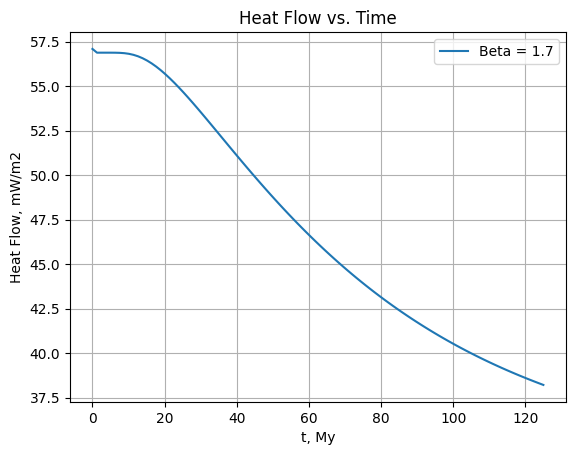

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def heat_flux(beta, t):

    # Define the variables and parameters
    a = 125
    tau = 62.8
    lam = 3.5
    T1 = 1333
    N = 100  # Number of terms in the sum

    # Define the equation for T/Tm with z as a variable
    T_sum = 0
    for n in range(1, N+1):
        Cn = beta / (n * np.pi) * np.sin(n * np.pi / beta) * np.exp(-n**2 * t / tau)
        T_sum += Cn
    T_over_Tm = 0.8 * (1 + 2 * T_sum) # 0.8 = 34.5 mW/m2

    return T_over_Tm * 10**-3 * 60 * 697


# beta_list = [1, 1.25, 1.5, 2, 4]
beta_list = [1.7]
t = np.linspace(0, 125, 100)

plt.figure()
for beta in beta_list:
    plt.plot(t, heat_flux(beta, t), label=f'Beta = {beta}')

plt.xlabel('t, My')
plt.ylabel('Heat Flow, mW/m2')
plt.title('Heat Flow vs. Time')
plt.grid(True)
plt.legend()
# plt.ylim(0, 140)
plt.show()

#### Temperature calculation (variable Heat Flow (F) for diffrent age)

In [ ]:
# import numpy as np
# import sympy as sp
# import matplotlib.pyplot as plt


def heat_flow_fundament_calculation(beta, t, Q_const, constant=False):

  ###
  # concstant = True: постоянный тепловой поток Q_const
  # Q_const: значение постоянного теплового потока, mW/m2

  ###

  if constant == True:
    return Q_const

  else:

    def tau_heat_flux(a, k):
      tau = a**2/(k * np.pi**2) # [second]
      # convert second to yaers, than to Million years
      seconds = tau
      years = seconds / 60 / 60 / 24 / 365.25  # Considering leap years
      return years * 10**-6 # [Myr]


    def heat_flux(beta, t):

        # Define the variables and parameters of lithosphere
        a = 125 * 1000 #m an initial lithosphere thickness
        k = 10**-6 #m2 s-1 thermal diffusivity of lithospheric rocks

        tau = tau_heat_flux(a, k)  # Myr Lithospheric time constant
        # tau = 62.8
        lam = 3.5 # Lithospheric thermal conductivity [W/mK]

        T1 = 1333
        N = 100 # Number of terms in the sum

        # Define the equation for F with z as a variable
        F_sum = 0
        for n in range(1, N+1):
            Cn = beta / (n * np.pi) * np.sin(n * np.pi / beta) * np.exp(-n**2 * t / tau)
            F_sum += Cn
        F_over_Tm = (lam*T1/a) * (1 + 2 * F_sum) # [mW/m2]
        return F_over_Tm

    return heat_flux(beta, t)

In [ ]:
tc_bulk_df

,Lithology_type,Event_name,245.0,210.0,160.0,145.0,125.0,100.0,80.0,55.0,45.0,0.0
0,Shales,Layer 10_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.972357
1,Sandstones,Layer 9_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.928576,2.033901
2,Shales,Layer 8_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.086252,1.159220,1.212027
3,Chalk,Layer 7_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.665822,2.199417,2.295180,2.366700
4,Sandstones,Layer 6_1,0.000000,0.000000,0.000000,0.000000,0.000000,2.178504,3.030594,3.260474,3.318780,3.370652
5,Limestones,Layer 5_1,0.000000,0.000000,0.000000,0.000000,1.768240,2.423864,2.908889,2.999533,3.020057,3.035541
6,Dolomite,Layer 4_1,0.000000,0.000000,0.000000,3.627857,3.856041,4.501078,4.953886,5.040980,5.051974,5.062992
7,Sandstones,Layer 3_1,0.000000,0.000000,1.963064,2.212554,2.364613,2.925044,3.586377,3.765516,3.815907,3.849875
8,Anhydrite,Layer 2_1,0.000000,5.654131,5.694157,5.747966,5.775061,5.870903,5.968335,5.996469,6.010585,6.010585
9,Quartzite,Layer 1_1,4.777836,5.277843,5.497812,5.726949,5.860011,6.294075,6.760291,6.864603,6.899731,6.917361


[0.0, 45.0, 55.0, 80.0, 100.0, 125.0, 145.0, 160.0, 210.0, 245.0]
0.0 63.685954533544326
45.0 52.870550930991655
55.0 50.17116620969431
80.0 45.191873652900995
100.0 42.61346524273573
125.0 40.53928690306466


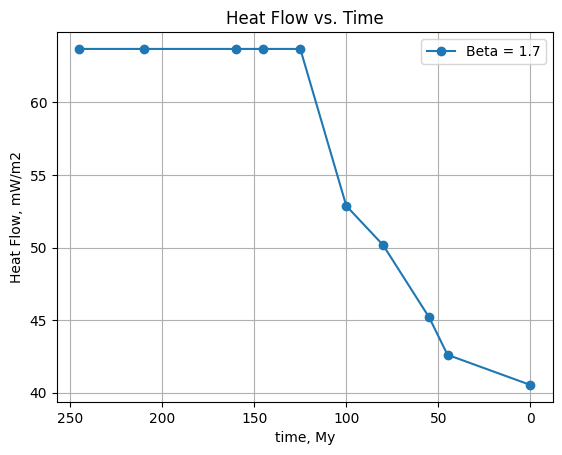

Age 0.0
0 Shales 200.0 200.0 0.04053928690306466
1 Sandstones 450.0 250.0 0.04053928690306466
2 Shales 1200.0 750.0 0.04053928690306466
3 Chalk 2500.0 1300.0 0.04053928690306466
4 Sandstones 3400.0 900.0 0.04053928690306466
5 Limestones 3600.0 200.0 0.04053928690306466
6 Dolomite 4000.0 400.0 0.04053928690306466
7 Sandstones 4250.0 250.0 0.04053928690306466
8 Anhydrite 5000.0 750.0 0.04053928690306466
9 Quartzite 5400.0 400.0 0.04053928690306466
Age 45.0
1 Sandstones 261.0 261.0 0.04261346524273573
2 Shales 1061.0 800.0 0.04261346524273573
3 Chalk 2391.0 1330.0 0.04261346524273573
4 Sandstones 3298.0 907.0 0.04261346524273573
5 Limestones 3499.0 201.0 0.04261346524273573
6 Dolomite 3900.0 401.0 0.04261346524273573
7 Sandstones 4151.0 251.0 0.04261346524273573
8 Anhydrite 4901.0 750.0 0.04261346524273573
9 Quartzite 5302.0 401.0 0.04261346524273573
Age 55.0
2 Shales 888.0 888.0 0.045191873652901
3 Chalk 2262.0 1374.0 0.045191873652901
4 Sandstones 3179.0 917.0 0.045191873652901
5 Limest

In [ ]:
T_with_rad_heat = pd.DataFrame()
T_without_rad_heat = pd.DataFrame()
T_linear_geotherm =  pd.DataFrame()
age_list = list(work_layers_with_color['Age (Ma)'][0:])

# Heat flow
heat_flow = []

# print(age_list)

beta = 1.7
# beta  = 2
Qm_array = []
print(age_list)
for t in age_list:
  if t <= 125:
    Qm_array.append(heat_flow_fundament_calculation(beta, t, Q_const=53.7*10**-3,
                                                    constant=False))
    print(t, heat_flow_fundament_calculation(beta, t, Q_const=53.7*10**-3, constant=False)*10**3)
  else:
    Qm_array.insert(0, heat_flow_fundament_calculation(beta, 0, Q_const=53.7*10**-3,
                                                       constant=False))
# print(Qm_array)
Qm_array = Qm_array[::-1]
plt.plot(age_list, [x * 10**3 for x in Qm_array], label=f'Beta = {beta}', marker='o')

plt.xlabel('time, My')
plt.ylabel('Heat Flow, mW/m2')
plt.title('Heat Flow vs. Time')
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis()
# plt.ylim(0, 140)
plt.show()
#  beta = stretch_factor_df[str(age)].iloc[0]

# Calculation for each age
for i, age in enumerate(age_list, start=0):

    work_layers_copy = work_layers_with_color.copy()

    T_list = []
    T_list_constant = []
    T_linear_geotherm_values = []

    T0 = 0
    G = 20

    print('Age', age)

    sum_variables_1, sum_variables_2 = [], []
    sum_variables_3, sum_variables_4 = [], []
    sum_variables_5 = []
    layers_sum = []
    heat_flow_list = []


### расчет для слоев с заданной литологией (work_layers)
    for row_index, row in enumerate(work_layers_copy[i::].itertuples(), start=i):

      lithology = work_layers_copy.at[row.Index, 'Lithology_type']
      layers_name = work_layers_with_color.at[row.Index, 'Event_name']

      A = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'Radiogenic Heat Production'].iloc[0]
      K = tc_bulk_df.loc[row_index:].loc[tc_bulk_df['Lithology_type'] == str(lithology), f'{age}'].iloc[0]
      thickness_layer = decompaction_df.loc[row_index:].loc[decompaction_df['Lithology_type'] == str(lithology), f'{age}'].iloc[0]*1000

      # K = tc.loc[row_index:].loc[tc['Lithology_type'] == str(lithology), f'{age}'].iloc[0] ### reference Table  A58.8

# ### Depth values
      depth = decompaction_corrected_df.loc[row_index:].loc[decompaction_corrected_df['Lithology_type'] == str(lithology), f'{age}'].iloc[0]*1000
# ### Initial depth values
      y1 = work_layers_with_color.loc[work_layers_with_color['Event_name'] == str(layers_name), 'Depth top, m'].iloc[0]
      y2 = work_layers_with_color.loc[work_layers_with_color['Event_name'] == str(layers_name), 'Depth bottom, m'].iloc[0]

      layers_sum.append(thickness_layer)
      crust_depth = sum(layers_sum)
      Qm = Qm_array[i]


### With radio heat
      if K == 0:
        sum_variables_1.append(0)
        sum_variables_2.append(0)
      else:
        sum_variables_1.append(((Qm+A*crust_depth)/K)*thickness_layer)
        sum_variables_2.append((A/(2*K))*(thickness_layer)**2)


      T = T0 + (sum(sum_variables_1) - sum(sum_variables_2))
      T_list.append(T)
      heat_flow_list.append(Qm)

      print(row_index, lithology, crust_depth, thickness_layer, Qm )

### without radio heat
      # Qm = 63*10**-3
      A = 0

      if K == 0:
        sum_variables_3.append(0)
      else:
        sum_variables_3.append(((Qm+A*crust_depth)/K)*thickness_layer)
        sum_variables_4.append((A/(2*K))*(thickness_layer)**2)

      T_no_heat = T0 + (sum(sum_variables_3) - sum(sum_variables_4))
      T_list_constant.append(T_no_heat)

      # print(row_index, lithology, crust_depth, thickness_layer, Qm )

# ### Linear teady-stage geotherm Appendix 12
      T_linear_geotherm_values.append(linear_geotherm(G, depth/1000))

### Save results in table

### with radio heat
    new_col_name = f'{age}'
    ### Save result for decompaction in table
    resized_list_new = np.zeros(work_layers_copy.shape[0])
    resized_list_new[len(resized_list_new) - len(T_list):] = T_list
    new_col_values = resized_list_new
    T_with_rad_heat[new_col_name] = new_col_values

### without radio heat
    resized_list_new = np.zeros(work_layers_copy.shape[0])
    resized_list_new[len(resized_list_new) - len(T_list_constant):] = T_list_constant
    new_col_values = resized_list_new
    T_without_rad_heat[new_col_name] = new_col_values


### Linear teady-stage geotherm Appendix 12
    resized_list_new = np.zeros(work_layers_copy.shape[0])
    resized_list_new[len(resized_list_new) - len(T_list_constant):] = T_linear_geotherm_values
    new_col_values = resized_list_new
    T_linear_geotherm[new_col_name] = new_col_values


In [ ]:
work_layers = work_layers_with_color
save_to_csv(T_with_rad_heat, work_layers, "Geotherm_with_A.csv")
save_to_csv(T_without_rad_heat, work_layers, "Geotherm_without_A.csv")
save_to_csv(T_linear_geotherm, work_layers, "Linear_Geotherm.csv")

In [ ]:
# ### добавление колонок Lithology_type,	Event_name
# work_layers.reset_index(drop=True, inplace=True)
# T_with_rad_heat['Event_name'] = work_layers['Event_name']
# T_with_rad_heat['Lithology_type'] = work_layers['Lithology_type']
# T_with_rad_heat = T_with_rad_heat[T_with_rad_heat.columns[::-1]]

# T_with_rad_heat.to_csv('/content/T_with_rad_heat.csv', index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# ### добавление колонок Lithology_type,	Event_name
# work_layers.reset_index(drop=True, inplace=True)
# T_without_rad_heat['Event_name'] = work_layers['Event_name']
# T_without_rad_heat['Lithology_type'] = work_layers['Lithology_type']
# T_without_rad_heat = T_without_rad_heat[T_without_rad_heat.columns[::-1]]

# T_without_rad_heat.to_csv('/content/T_without_rad_heat.csv', index=True)

In [ ]:
T_with_rad_heat

,0.0,45.0,55.0,80.0,100.0,125.0,145.0,160.0,210.0,245.0,Event_name,Lithology_type
0,8.373323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 10_1,Shales
1,13.404209,5.788203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 9_1,Sandstones
2,39.357698,35.972057,37.560950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 8_1,Shales
3,62.031916,61.065579,66.186376,52.982520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 7_1,Chalk
4,73.801555,73.644407,79.814634,69.704126,29.644305,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 6_1,Sandstones
5,76.587831,76.593642,82.952842,73.338834,34.768026,10.817698,0.000000,0.000000,0.000000,0.000000,Layer 5_1,Limestones
6,79.910711,80.093541,86.661694,77.531949,39.798636,18.423703,8.333315,0.000000,0.000000,0.000000,Layer 4_1,Dolomite
7,82.864656,83.214283,90.013123,81.468887,45.335837,27.713701,18.706277,12.764280,0.000000,0.000000,Layer 3_1,Sandstones
8,87.980854,88.588060,95.728195,87.840150,52.194715,36.158485,27.198414,21.364396,8.689504,0.000000,Layer 2_1,Anhydrite
9,90.475405,91.212924,98.513722,90.973744,55.792210,40.896819,32.093325,26.539981,14.161963,6.289782,Layer 1_1,Quartzite


In [ ]:
# T_with_rad_heat_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'T_with_rad_heat_test' is not defined

###Sekiguchi–Waples Model

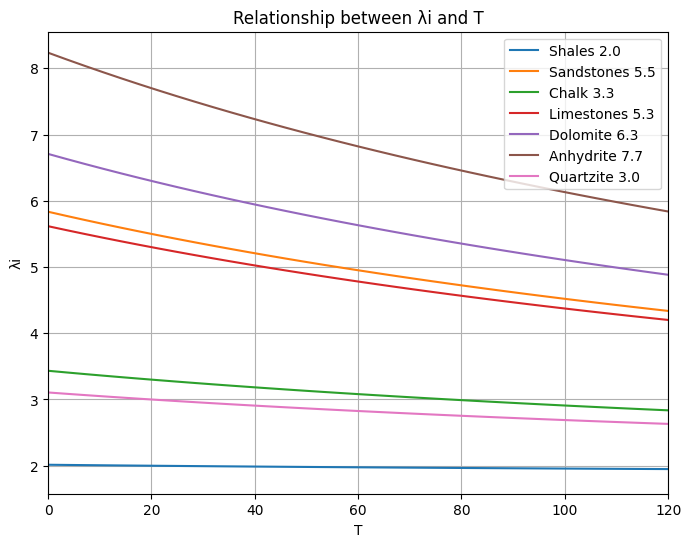

In [ ]:
def Sekiguchi_Waples(T, lambda_m, correction=True):
  ###
  # return thermal conductivity depending from tempreture
  ###
  if correction == True:
    return 358 * (1.0227 * lambda_m - 1.882) * (T**(-1) - 0.00068) + 1.84
  else:
    pass

# Get the unique values from the "TC matrix" column
lam_20_range = df_constast["TC matrix"].unique()
label_range = df_constast["Lithology_type"]

fig, ax = plt.subplots(figsize=(8, 6))

for lam_20, lit in zip(lam_20_range,label_range):

  T_range = np.linspace(0, 350, 100)

  lambda_m = lam_20
  lambda_i_values = [Sekiguchi_Waples(T+273.15, lambda_m, correction=True) for T in T_range]

  ax.plot(T_range, lambda_i_values, label=f'{lit} {lam_20}')

ax.set_xlabel('T')
ax.set_ylabel('λi')
ax.set_title('Relationship between λi and T')
ax.grid(True)
ax.legend()
plt.xlim(0, 120)
plt.show()

0.0 63.685954533544326
45.0 52.870550930991655
55.0 50.17116620969431
80.0 45.191873652900995
100.0 42.61346524273573
125.0 40.53928690306466
145.0 39.482373097884626


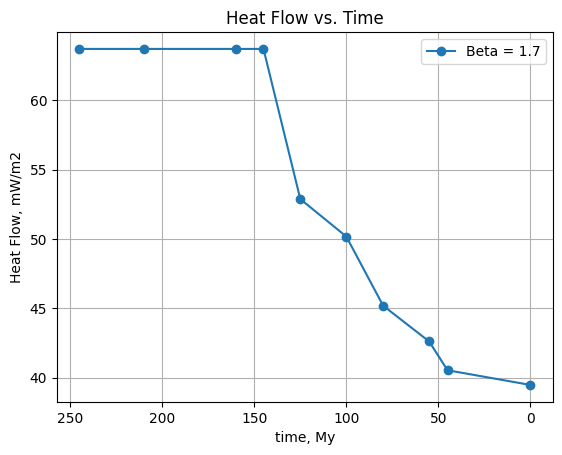

Age 0.0
0 Shales 0.599 8.133534332878806 0.975154151826328
1 Sandstones 0.449 12.942481500902288 2.0728223717558802
2 Shales 0.416 38.20736121898734 1.2136869506433425
3 Chalk 0.195 60.89442342449092 2.3047975341014135
4 Sandstones 0.221 73.3839220148863 3.1002153935845405
5 Limestones 0.049 76.34061640195415 2.7890858979696356
6 Dolomite 0.021 80.0594091052339 4.410288646820577
7 Sandstones 0.161 83.33832561958522 3.387732876348846
8 Anhydrite 0.02 89.231715462965 5.083433409223192
9 Quartzite 0.042 92.18030472215294 5.708814541293484
Age 45.0
1 Sandstones 0.473 5.339845941456124 1.9894985916755858
2 Shales 0.453 34.01180200532599 1.1624735141266502
3 Chalk 0.213 58.38977021731939 2.2493869507179927
4 Sandstones 0.228 71.378287679062 3.069256144013466
5 Limestones 0.052 74.42846768092602 2.7834245560352553
6 Dolomite 0.022 78.24064399059276 4.419956602060192
7 Sandstones 0.165 81.61827074237647 3.3715512250296324
8 Anhydrite 0.02 87.64144994423533 5.104267056807853
9 Quartzite 0.043 9

In [ ]:
T_with_rad_heat_test = pd.DataFrame()
T_without_rad_heat_test = pd.DataFrame()
T_linear_geotherm_test =  pd.DataFrame()
# age_list = list(df_well['Age (Ma)'][1:])

K_list = []

# Heat flow
heat_flow = []

# print(age_list)

beta = 1.7
Qm_array = []
for t in age_list:
  if t <= 145:
    Qm_array.append(heat_flow_fundament_calculation(beta, t, Q_const=63*10**-3,
                                                    constant=False))
    print(t, heat_flow_fundament_calculation(beta, t, Q_const=63*10**-3, constant=False)*10**3)
  else:
    Qm_array.insert(0, heat_flow_fundament_calculation(beta, 0, Q_const=63*10**-3,
                                                       constant=False))
# print(Qm_array)
Qm_array = Qm_array[::-1]
plt.plot(age_list, [x * 10**3 for x in Qm_array], label=f'Beta = {beta}', marker='o')

plt.xlabel('time, My')
plt.ylabel('Heat Flow, mW/m2')
plt.title('Heat Flow vs. Time')
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis()
# plt.ylim(0, 140)
plt.show()
#  beta = stretch_factor_df[str(age)].iloc[0]

# Calculation for each age
for i, age in enumerate(age_list, start=0):

    work_layers_copy = work_layers.copy()

    T_list = []
    T_list_constant = []
    T_linear_geotherm_values = []

    T0 = 0
    G = 20

    print('Age', age)

    sum_variables_1, sum_variables_2 = [], []
    sum_variables_3, sum_variables_4 = [], []
    sum_variables_5 = []
    layers_sum = []
    heat_flow_list = []


### расчет для слоев с заданной литологией (work_layers)
    for row_index, row in enumerate(work_layers_copy[i::].itertuples(), start=i):

      lithology = work_layers_copy.at[row.Index, 'Lithology_type']
      layers_name = work_layers_copy.at[row.Index, 'Event_name']

      A = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'Radiogenic Heat Production'].iloc[0]
      K_20= tc_bulk_df.loc[row_index:].loc[tc_bulk_df['Lithology_type'] == str(lithology), f'{age}'].iloc[0]
      thickness_layer = decompaction_df.loc[row_index:].loc[decompaction_df['Lithology_type'] == str(lithology), f'{age}'].iloc[0]*1000

### Sekiguchi_Waples
      tc_matrix = df_constast.loc[df_constast['Lithology_type'] == str(lithology), 'TC matrix'].iloc[0]
      phi0 = porosity_df.loc[(porosity_df['Lithology_type'] == str(lithology)) & (porosity_df['Event_name'] == layers_name), f'{age}'].iloc[0]
      tc_water = 0.60

      if row_index == i:
        T_sg = T0
        if T0 == 0:
          T0 = 10**-3

        K_mtrx_corrected_SG = Sekiguchi_Waples(T_sg+273.15, tc_matrix, correction=True)
        # K = bulk_thermal_conductivity(K_mtrx_corrected_SG, tc_water, phi0)
        K = bulk_thermal_conductivity_geomean(K_mtrx_corrected_SG, tc_water, phi0)
      else:
        T_sg = T_list[-1]
        K_mtrx_corrected_SG = Sekiguchi_Waples(T_sg+273.15, tc_matrix, correction=True)
        # print(T_sg, lithology, tc_matrix, K_mtrx_corrected_SG)
        # K = bulk_thermal_conductivity(K_mtrx_corrected_SG, tc_water, phi0) # Arithmetic mean
        K = bulk_thermal_conductivity_geomean(K_mtrx_corrected_SG, tc_water, phi0) # Geometric mean
        K_list.append(K)


# ### Depth values
      depth = decompaction_corrected_df.loc[row_index:].loc[decompaction_corrected_df['Lithology_type'] == str(lithology), f'{age}'].iloc[0]*1000
# ### Initial depth values
      y1 = work_layers.loc[work_layers['Event_name'] == str(layers_name), 'Depth top, m'].iloc[0]
      y2 = work_layers.loc[work_layers['Event_name'] == str(layers_name), 'Depth bottom, m'].iloc[0]

      layers_sum.append(thickness_layer)
      crust_depth = sum(layers_sum)
      Qm = Qm_array[i]


### With radio heat
      if K == 0:
        sum_variables_1.append(0)
        sum_variables_2.append(0)
      else:
        sum_variables_1.append(((Qm+A*crust_depth)/K)*thickness_layer)
        sum_variables_2.append((A/(2*K))*(thickness_layer)**2)


      T = T0 + (sum(sum_variables_1) - sum(sum_variables_2))
      T_list.append(T)
      # heat_flow_list.append(Qm)

      # print(row_index, lithology, crust_depth, thickness_layer, K, Qm, T, phi0)
      # print(row_index, lithology, phi0, T, K, K_20, tc_matrix)
      print(row_index, lithology, phi0, T, K)

### without radio heat
      # Qm = 63*10**-3
      A = 0

      if K == 0:
        sum_variables_3.append(0)
      else:
        sum_variables_3.append(((Qm+A*crust_depth)/K)*thickness_layer)
        sum_variables_4.append((A/(2*K))*(thickness_layer)**2)

      T_no_heat = T0 + (sum(sum_variables_3) - sum(sum_variables_4))
      T_list_constant.append(T_no_heat)

      # print(row_index, lithology, crust_depth, thickness_layer, Qm )

# ### Linear teady-stage geotherm Appendix 12
      T_linear_geotherm_values.append(linear_geotherm(G, depth/1000))

# ### Save results in table

### with radio heat
    new_col_name = f'{age}'
    ### Save result for decompaction in table
    resized_list_new = np.zeros(work_layers_copy.shape[0])
    resized_list_new[len(resized_list_new) - len(T_list):] = T_list
    new_col_values = resized_list_new
    T_with_rad_heat_test[new_col_name] = new_col_values

### without radio heat
    resized_list_new = np.zeros(work_layers_copy.shape[0])
    resized_list_new[len(resized_list_new) - len(T_list_constant):] = T_list_constant
    new_col_values = resized_list_new
    T_without_rad_heat_test[new_col_name] = new_col_values


### Linear teady-stage geotherm Appendix 12
    resized_list_new = np.zeros(work_layers_copy.shape[0])
    resized_list_new[len(resized_list_new) - len(T_list_constant):] = T_linear_geotherm_values
    new_col_values = resized_list_new
    T_linear_geotherm_test[new_col_name] = new_col_values


In [ ]:
pd.DataFrame(K_list)

,0
0,2.072822
1,1.213687
2,2.304798
3,3.100215
4,2.789086
5,4.410289
6,3.387733
7,5.083433
8,5.708815
9,1.162474


In [ ]:
save_to_csv(T_with_rad_heat_test, work_layers, "Geotherm_SG.csv")

In [ ]:
save_to_csv(T_without_rad_heat_test, work_layers, "Geotherm_SG_without A.csv")

In [ ]:
T_without_rad_heat_test

,0.0,45.0,55.0,80.0,100.0,125.0,145.0,160.0,210.0,245.0,Event_name,Lithology_type
0,8.098668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 10_1,Shales
1,12.860578,5.319302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 9_1,Sandstones
2,37.258780,33.217941,34.714264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 8_1,Shales
3,59.528452,57.187695,61.907808,46.284782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 7_1,Chalk
4,70.990280,69.167514,74.966199,61.356059,26.815292,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 6_1,Sandstones
5,73.821486,72.094986,78.087617,64.762903,31.670482,8.748750,0.000000,0.000000,0.000000,0.000000,Layer 5_1,Limestones
6,77.402419,75.772908,82.011197,68.892955,36.531446,14.872865,7.933181,0.000000,0.000000,0.000000,Layer 4_1,Dolomite
7,80.316047,78.790913,85.285736,72.531581,41.728095,22.384767,17.971390,12.323061,0.000000,0.000000,Layer 3_1,Sandstones
8,86.141200,84.747589,91.663247,79.116965,48.628203,29.431895,26.401276,20.723277,8.181219,0.000000,Layer 2_1,Anhydrite
9,88.907615,87.590598,94.715928,82.317021,52.233277,33.410380,31.318176,25.854792,13.433362,5.945226,Layer 1_1,Quartzite


In [ ]:
T_with_rad_heat_test

,0.0,45.0,55.0,80.0,100.0,125.0,145.0,160.0,210.0,245.0,Event_name,Lithology_type
0,8.133534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 10_1,Shales
1,12.942482,5.339846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 9_1,Sandstones
2,38.207361,34.011802,35.329130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 8_1,Shales
3,60.894423,58.389770,62.924705,46.642624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 7_1,Chalk
4,73.383922,71.378288,76.983494,62.604933,27.201704,0.000000,0.000000,0.000000,0.000000,0.000000,Layer 6_1,Sandstones
5,76.340616,74.428468,80.225023,66.117638,32.120812,8.761160,0.000000,0.000000,0.000000,0.000000,Layer 5_1,Limestones
6,80.059409,78.240644,84.280470,70.361489,37.045664,14.909808,7.944988,0.000000,0.000000,0.000000,Layer 4_1,Dolomite
7,83.338326,81.618271,87.915326,74.332964,42.491709,22.580016,18.106520,12.368568,0.000000,0.000000,Layer 3_1,Sandstones
8,89.231715,87.641450,94.358829,80.975922,49.426640,29.646871,26.552455,20.779019,8.186171,0.000000,Layer 2_1,Anhydrite
9,92.180305,90.663342,97.590082,84.336328,53.143772,33.703484,31.539303,25.966171,13.479383,5.956217,Layer 1_1,Quartzite


In [ ]:
T0 = 0
Linear = T_linear_geotherm_test["0.0"].tolist()
Linear.insert(0, T0)

A_line = T_without_rad_heat_test["0.0"].tolist()
A_line.insert(0, T0)

C_line = T_with_rad_heat_test["0.0"].tolist()
C_line.insert(0, T0)

[0, 9.999999999999986, 14.352173913043478, 29.999999999999996, 53.130434782608695, 73.35217391304349, 70.3913043478261, 81.54782608695652, 90.35217391304346, 100.39999999999998, 107.99999999999999] [0, 0.2, 0.45, 1.2, 2.5, 3.4, 3.6, 4.0, 4.25, 5.0, 5.4]


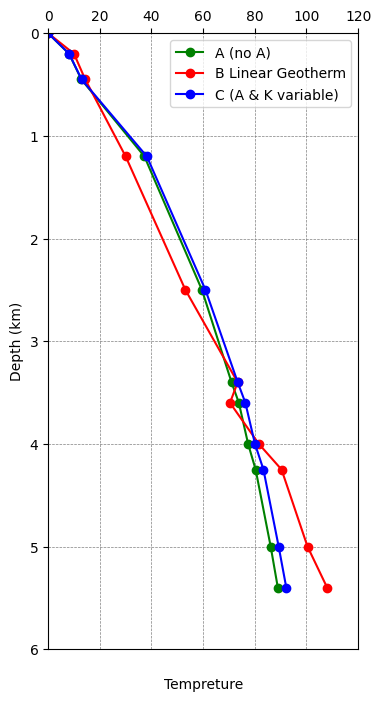

In [ ]:
y = work_layers["Depth bottom, m"].tolist()
y_add = y.insert(0, 0)

print(Linear, y)

plt.figure(figsize=(4, 8))
plt.plot(A_line, y , label='A (no A)', marker='o', color='green')
# plt.plot(T_true['0'], y , label='McKenzie')
plt.plot(Linear, y , label='B Linear Geotherm', marker='o', color='red')
plt.plot(C_line, y , label='C (A & K variable)', marker='o', color='blue')


# plt.axis([np.round(max(age_values), -2), np.min(age_values), np.max(output_df)+0.5, 0])

plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)
# plt.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=True)

# Move the x-axis label to the top
plt.xlabel(f'Tempreture', labelpad=20)
plt.ylabel(f'Depth (km)')
# plt.gca().xaxis.set_label_coords(0.5, 1.15)

plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.xlim(0, 120)
plt.ylim(0, 6)
plt.gca().invert_yaxis()
plt.show()

#### Plot: Geotherm

In [ ]:
T0 = 0
Linear = T_linear_geotherm["0.0"].tolist()
Linear.insert(0, T0)

A_line = T_without_rad_heat["0.0"].tolist()
A_line.insert(0, T0)

C_line = T_with_rad_heat["0.0"].tolist()
C_line.insert(0, T0)

[0, 9.999999999999986, 14.352173913043478, 29.999999999999996, 53.130434782608695, 73.35217391304349, 70.3913043478261, 81.54782608695652, 90.35217391304346, 100.39999999999998, 107.99999999999999] [0, 0.2, 0.45, 1.2, 2.5, 3.4, 3.6, 4.0, 4.25, 5.0, 5.4]


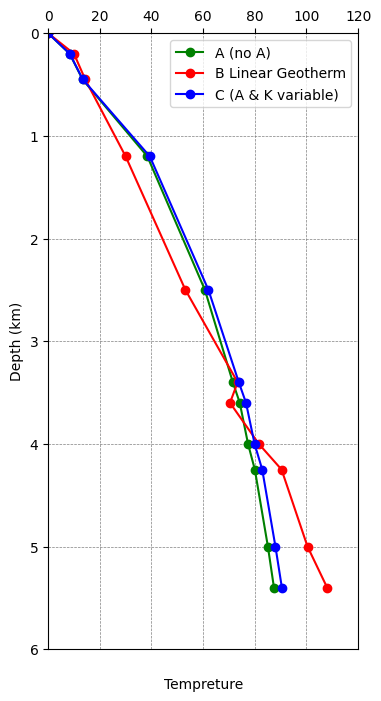

In [ ]:
y = work_layers["Depth bottom, m"].tolist()
y_add = y.insert(0, 0)

print(Linear, y)

plt.figure(figsize=(4, 8))
plt.plot(A_line, y , label='A (no A)', marker='o', color='green')
# plt.plot(T_true['0'], y , label='McKenzie')
plt.plot(Linear, y , label='B Linear Geotherm', marker='o', color='red')
plt.plot(C_line, y , label='C (A & K variable)', marker='o', color='blue')


# plt.axis([np.round(max(age_values), -2), np.min(age_values), np.max(output_df)+0.5, 0])

plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)
# plt.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=True)

# Move the x-axis label to the top
plt.xlabel(f'Tempreture', labelpad=20)
plt.ylabel(f'Depth (km)')
# plt.gca().xaxis.set_label_coords(0.5, 1.15)

plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.xlim(0, 120)
plt.ylim(0, 6)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
def makeplot(data1, data2, top_depth, bottom_depth):
    # fig = plt.figure(constrained_layout=True, figsize=(10, 6))
    # ax = fig.subplots(1, 2,  sharex=False)

    fig, ax = plt.subplots(figsize=(14,7))

    ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1, sharey = ax1)
    ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1, sharey = ax1)

    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
    # ax10 = ax1.twiny()
    # ax10.xaxis.set_visible(False)

    # ax13 = ax4.twiny()
    # ax13.xaxis.set_visible(False)

### Plot 1
    # Geotherma
    T0 = 0

    x_values = data1['0.0'].tolist()
    x_values.insert(0, T0)
    y_values = decompaction_corrected_df['0.0'].tolist()
    y_values.insert(0, 0)
    ax1.plot(x_values, y_values, label='With radiation', marker='o', color='red')

    x_values = data2['0.0'].tolist()
    x_values.insert(0, T0)
    y_values = decompaction_corrected_df['0.0'].tolist()
    y_values.insert(0, 0)
    ax1.plot(x_values, y_values, label='Linear', marker='o', color='black')
    # ax1.plot(T_true['0'], decompaction_corrected_df['0'], label='McKenzie')

    ax1.set_xlabel(f'Tempreture', labelpad=20)
    ax1.set_ylabel(f'Depth (km)')
    ax1.legend()
    ax1.set_xlim([0, 120])

### Plot 2
    # Lithology track
    # ax2.plot(T_with_rad_heat["Lithology"], T_with_rad_heat['depth 0'], color = "black", linewidth = 0.5)
    ax2.set_xlabel("Lithology")
    ax2.set_xlim(0, 1)
    ax2.xaxis.label.set_color("black")
    ax2.tick_params(axis='x', colors="black")
    ax2.spines["top"].set_edgecolor("black")
    ax2.set_xticks([0, 1])

    depth_start = 0

    for lit, depth in zip(work_layers_with_color.index, decompaction_corrected_df['0.0']):
        key = int(lit)
        color = work_layers_with_color.at[lit, 'Color']
        hatch = work_layers_with_color.at[lit, 'Index']

        depth_values = [depth_start, depth]
        depth_start = depth

        ax2.fill_betweenx(depth_values, 0, 1, facecolor=color, hatch=hatch)

    ax2.set_xticks([0, 1])

### Plot3
    ax3.set_xlabel("Lithology")
    ax3.set_xlim(0, 1)
    ax3.xaxis.label.set_color("black")
    ax3.tick_params(axis='x', colors="black")
    ax3.spines["top"].set_edgecolor("black")
    ax3.set_xticks([0, 1])

    depth_start = 0

    for lit, depth in zip(work_layers_with_color['Lithology_type'], decompaction_corrected_df['0.0']):
        key = lit
        depth_values = [depth_start, depth]
        depth_start = depth

        label_position = (0.5, sum(depth_values) / 2)  # Assuming x position is at 0.5
        ax3.text(label_position[0], label_position[1], key, ha='center', va='center')
        ax3.plot([0, 1], [depth, depth], color='black', linewidth=1)  # Assuming black color and linewidth of 1



    for ax in [ax1, ax2, ax3]:
        ax.set_ylim(bottom_depth, top_depth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))

    for ax in [ax2]:
        plt.setp(ax.get_yticklabels(), visible = False)

    plt.tight_layout()
    fig.subplots_adjust(wspace = 0.15)

<ipython-input-614-57f9e49145b8>:61: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.
  ax2.fill_betweenx(depth_values, 0, 1, facecolor=color, hatch=hatch)


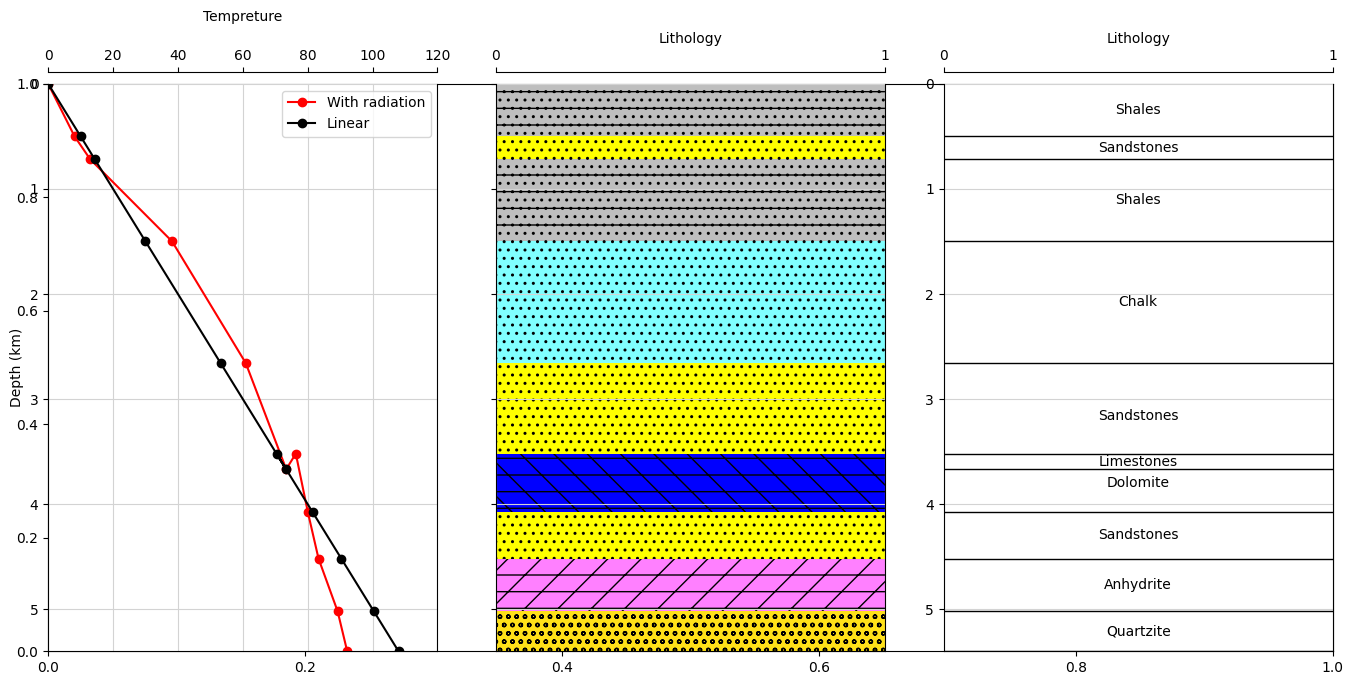

In [ ]:
temperature = pd.read_csv('/content/Geotherm_SG.csv', skiprows=0, header=0)
linear_temperature = pd.read_csv('/content/Linear_Geotherm.csv', skiprows=0, header=0)

makeplot(temperature, # данные 1: геотерма с изменяюшимся ТС и Радиацией
         linear_temperature,  # данные 2: линейная геотерма
         0, max(decompaction_corrected_df['0.0']))

### Plot: Paleotemperature

[0.0, 45.0, 55.0, 80.0, 100.0, 125.0, 145.0, 160.0, 210.0, 245.0]


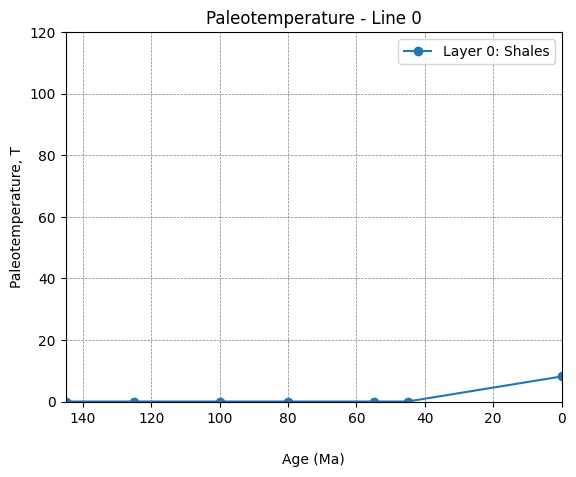

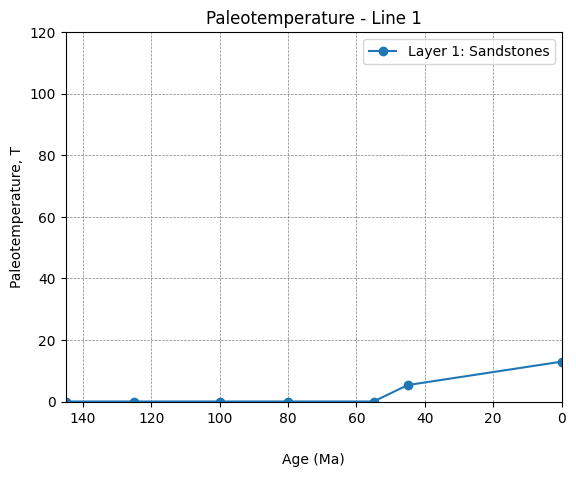

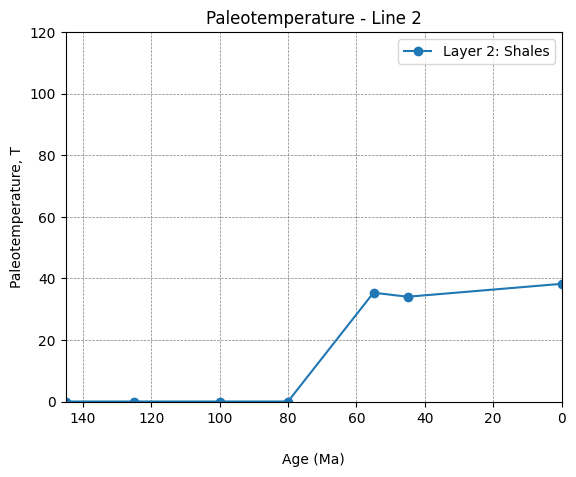

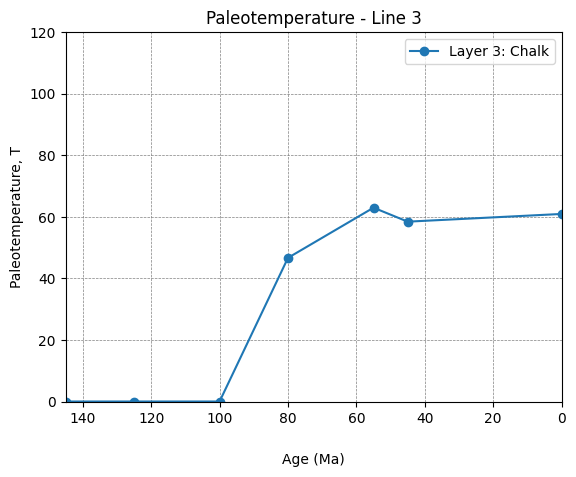

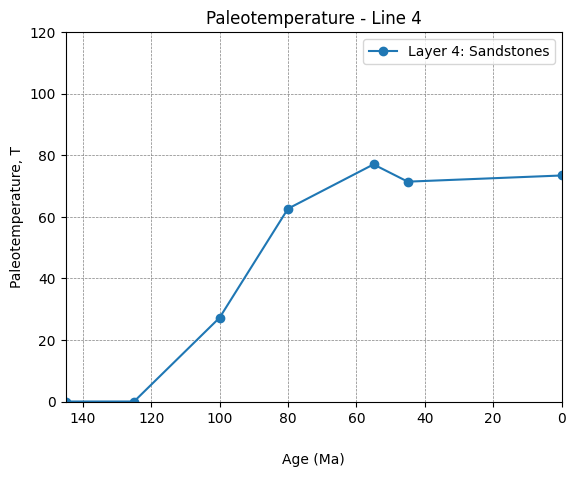

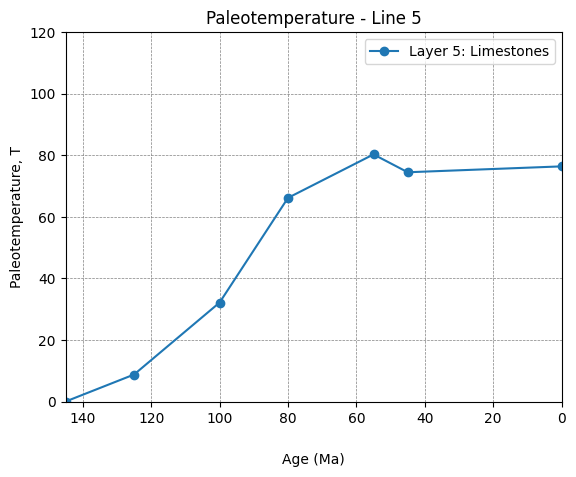

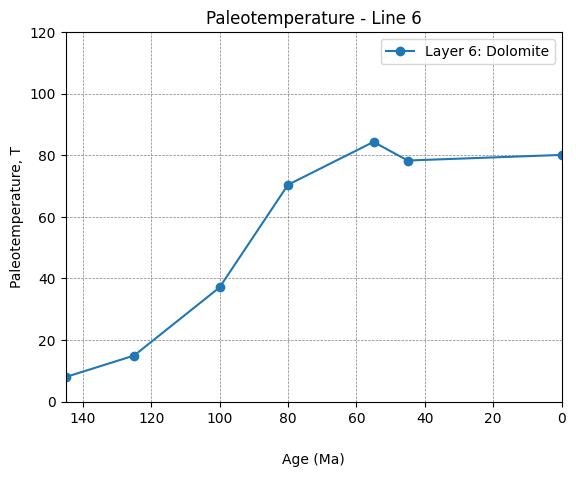

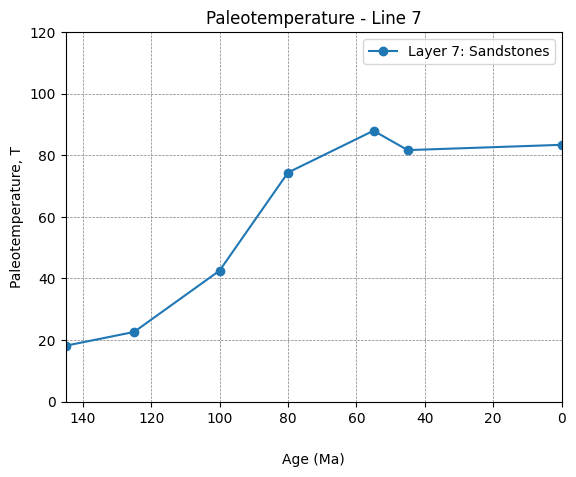

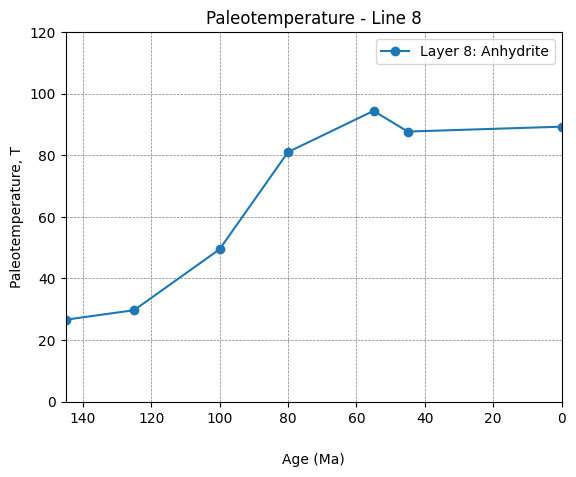

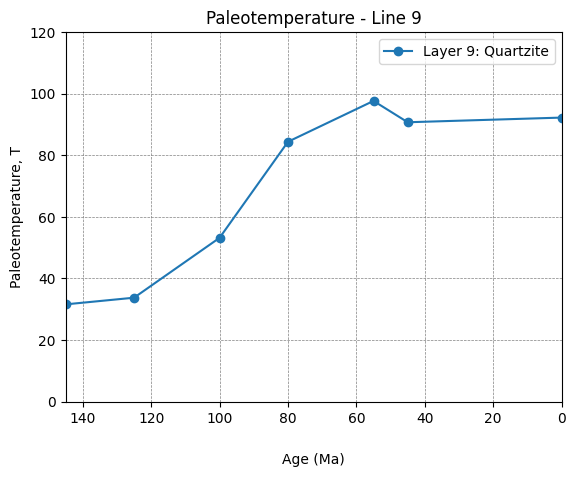

In [ ]:
# age_values = [float(age) for age in work_layers['Age (Ma)'][0:]]

# values_for_plot = pd.read_csv('/content/Geotherm_with_A', skiprows=0, header=0)
values_for_plot = pd.read_csv('/content/Geotherm_SG.csv', skiprows=0, header=0)

age_values = values_for_plot.iloc[0:, 3:values_for_plot.shape[1]].columns.astype(float).tolist()[::-1]
print(age_values)

for row_index, row in values_for_plot.iloc[0:, 3:values_for_plot.shape[1]].iterrows():
    plt.figure()  # Create a new figure for each row
    lithology = values_for_plot["Lithology_type"][row_index]
    plt.plot(age_values, row[::-1], label= "Layer "+ str(row_index) + ": "+ str(lithology), marker='o')
    plt.xlabel('Age (Ma)', labelpad=20)
    plt.ylabel('Paleotemperature, T')
    plt.legend()
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.xlim(0, 145)
    plt.ylim(0, 120)
    plt.gca().invert_xaxis()
    plt.title(f"Paleotemperature - Line {row_index}")
    plt.show()

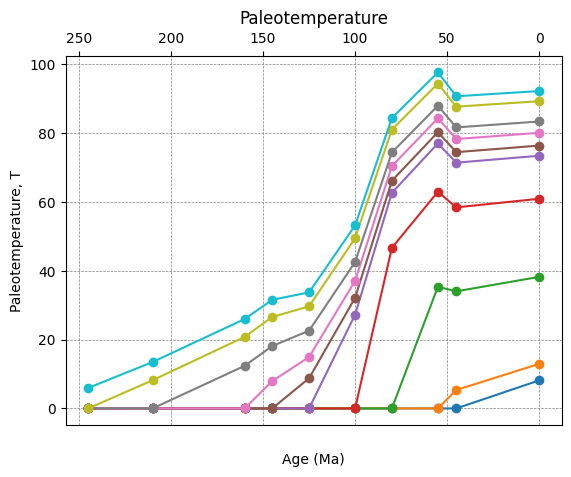

In [ ]:
# age_values  = [int(age) for age in work_layers['Age (Ma)'][0:]]
# print(age_values )
# print(age_values[::-1])

values_for_plot = pd.read_csv('/content/Geotherm_SG.csv',
                              skiprows=0, header=0)

age_values = values_for_plot.iloc[0:, 3:values_for_plot.shape[1]].columns.astype(float).tolist()[::-1]
for row_index, row in values_for_plot.iloc[0:, 3:values_for_plot.shape[1]].iterrows():
  plt.plot(age_values, row[::-1], label=str(row_index), marker='o')

# Move the x-axis label to the top
plt.xlabel('Age (Ma)', labelpad=20)
plt.ylabel('Paleotemperature, T')

# Adjust tick parameters
plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False)

# plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# plt.xlim(0, 145)
plt.gca().invert_xaxis()
plt.title("Paleotemperature")


# Display the plot
plt.show()